# Table of Contents

- [GAN](#GAN)
- [Exercises](#exercises)


## Housekeeping



-   Some references for today
    -   [Official pytorch tutorials](https://pytorch.org/tutorials/)
        -   E.g. the [DCGAN tutorial](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)
    -   [Deep Generative Models](https://www.deeplearningbook.org/contents/generative_models.html) from the [Deep Learning Book](https://www.deeplearningbook.org/)
    -   [GAN chapter of Dive Into Deep Learning](https://d2l.ai/chapter_generative-adversarial-networks/gan.html)
-   Today's url
    -   https://git.io/ml2021-12
-   Email if you need help with any of this!



## Beyond Classification



-   The idea of Machine Learning and Deep Learning, in particular, is
    that the model is not just learning to classify but capturing
    essential features of the inputs: the **latent variables** of the dataset
    -   Not every pixel is created equal, in a dataset of cats, there are
        far fewer ways to draw cat images than there are possible values for the pixels
    -   So, in our cat example, the latent variables could represent things like: 
        -    The length/color of the cat's coat
        -    The direction the cat is facing
        -    The pose of the cat (where its looking, close up or far away)
        -    Etc. etc. etc.
-   We can train a model to find and fit the underlying latent variables which
    captures the essential features and then can be used in ways other
    than simply classifying the input
-   For example, we could use it to do:
    -   Denoising: Given a noisy or degraded sample, recover the original
        (e.g. remove dirt or recolorize an old film image)
    -   Missing value imputation: fill in some missing data from a sample
        (e.g. given an image where a black square was put over part of the
        image, fill in what was in the square)
    -   Sampling: randomly generate a sample input drawn from the latent
        variable probability distribution (starting from some random
        noise, generate a random image that fits in the dataset)

Image from:
https://www.cc.gatech.edu/~hays/7476/projects/Avery_Wenchen/

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://www.cc.gatech.edu/~hays/7476/projects/Avery_Wenchen/images/architecture_overview.png')

## Sampling



-   We have a **generator**, which we think of as a black box for now
-   The generator should be fed a vector from the latent variable space
    -   We can posit that the latent variables are gaussian, so pick out a
        multi-dimensional gaussian, and give any arbitrary dimension
    -   Today, we won't give the latent variables explicit meaning, but
        for our cat e.g. it could be things like what direction the cat is
        facing, the color of the fur (along some spectrum), length of fur, shape of face, etc. etc.
-   The generator should spit out sample that is indistinguishable from
    a sample pulled from the dataset
-   Say we take MNIST, and posit a latent space of dimension 10
-   If we have an MNIST generator, we sample a gaussian 10 times, feed
    that 10D vector into the generator and it should spit out a 28x28
    image of a hand-drawn number
-   This drawing should be indistinguishable from the original MNIST set
    (given two images, one drawn from MNIST and one from the generator,
    it should be impossible to tell which is which (assuming you
    haven't just memorized the entire MNIST set))



## How to Build a Generator?



-   There are several ways we can take our basic CNN DL setup and use it
    to build a generator G
-   Thinking about the last point of the previous page: what if we had a
    network that tries to distinguish real MNIST images from images from
    the generator?
    -   A *discriminator* network D, outputs 0 for generated images, 1 for
        real images
-   We could use the discriminator output like a loss function:
    -   Use G to generate an image from a random latent vector and pass
        through D
    -   Make small changes to the parameters of G and see how D changes
    -   Update the parameters of G so that the D output **increases**
    -   I.e. we try to change G so that D gives values closer to 1 (the
        output for a real MNIST image)
    -   Eventually, G should only output images that give D output 1



## Adversaries



-   But now D is useless: it can't tell real from fake images
-   But what if we now train D? I.e. pass real images and update D so it
    gives outputs closer to 1, pass fake images and update D so it gives
    outputs closer to 0
    -   Whatever criteria D used before to tell real from fake images no
        longer works, so we retrain D to find new criteria
-   For a fixed network G, if we update D enough, images from G will be
    given output 0 and images from MNIST will have output 1
-   With the updated D, we can start training G again to fool the new D
-   We can keep playing this game as long as we like
    -   Train G to fool D
    -   Train D to figure out which images are from G
    -   Ad infinitum



## GAN



-   GAN: Generative Adversarial Network
-   This is the name for the setup we just described:
    -   Two networks are randomly initialized
        -   D takes in an image and outputs a number from 0 to 1
        -   G takes in a vector and outputs an image (so its output can be fed into D)
        -   The internal structure of the networks can be anything: D could
            be a feed-forward neural network, or a CNN, or anything else
        -   We'll go through how to structure G, but a simple feed forward
            network can also be used
    -   The networks are trained successively so the D distinguishes real
        from G images, then G is trained to fool the current D into
        believing its images are real
    -   And so on and on

- We can mathematically write this as:
  $$\min_{G} \max_{D} V(D,G) = E_{x \sim p_{data}(x)}[\log{D(x)}] + E_{z \sim p_z(z)}[1-\log{D(G(z))}]$$
    - We want a D and G for which V is maximized by D and minimized by G
    - V gives large values when the expected value of D over the data is close to 1 (log D close to 0), and the expected value of G (fed by Gaussian noise) through D is close to 0 (log D(G) close to -infinity)
    - V gives small values when the expected value of D over the data is close to 0 (log D close to -infinity), and the expected value of G through D is close to 1 (log D(G) close to 0)

Original GAN paper:
[https://arxiv.org/abs/1406.2661](https://arxiv.org/abs/1406.2661)


## GAN



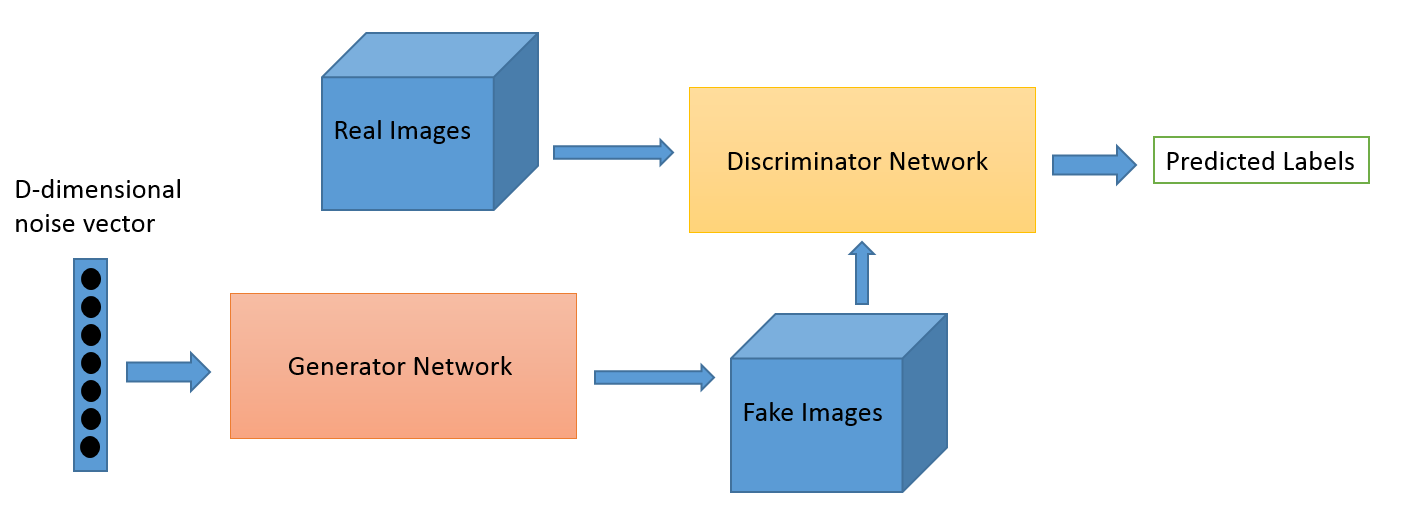

In [ ]:
from IPython.display import Image
Image("Gan.png")

-   Feed noise (random point in latent space) into G
-   Train G to fool D, train D to catch out G,   
    its a competition between the two networks
-   Alternate gradient descent on batches between G and D

## This Person Does Not Exist



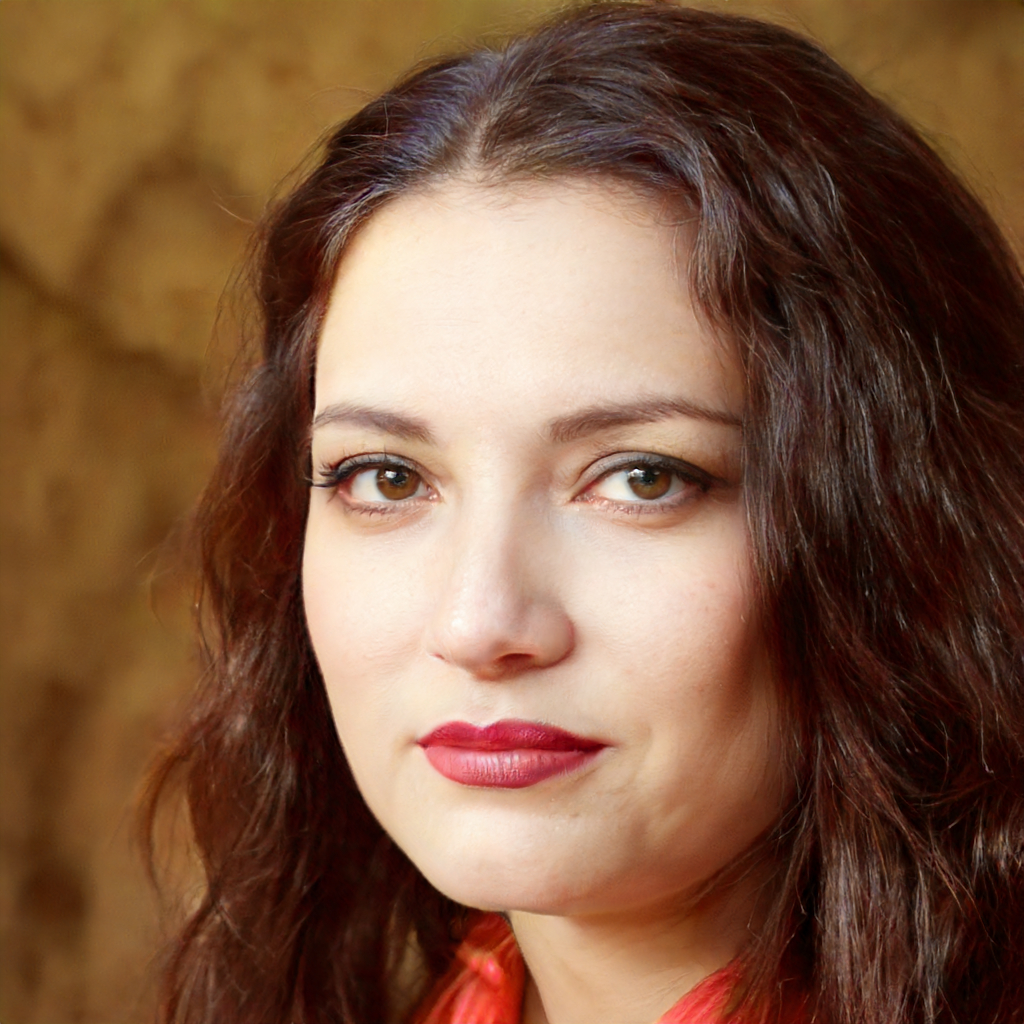

In [ ]:
Image("tpdne.jpg")

-   This is the first image I got when I visited [this person does not exist](https://www.thispersondoesnotexist.com/)
-   They've trained a GAN (technically, StyleGAN, an extension of the
    GAN idea) on human portrait photos
    -   StyleGAN also allows them to control specific aspects of the
        latent space (hair color, skin color, gender, etc.)
    -   Can see how powerful the results can be
-   Highly recommend watching the videos from nVidia on this (accessible through the link)



## CaloGAN



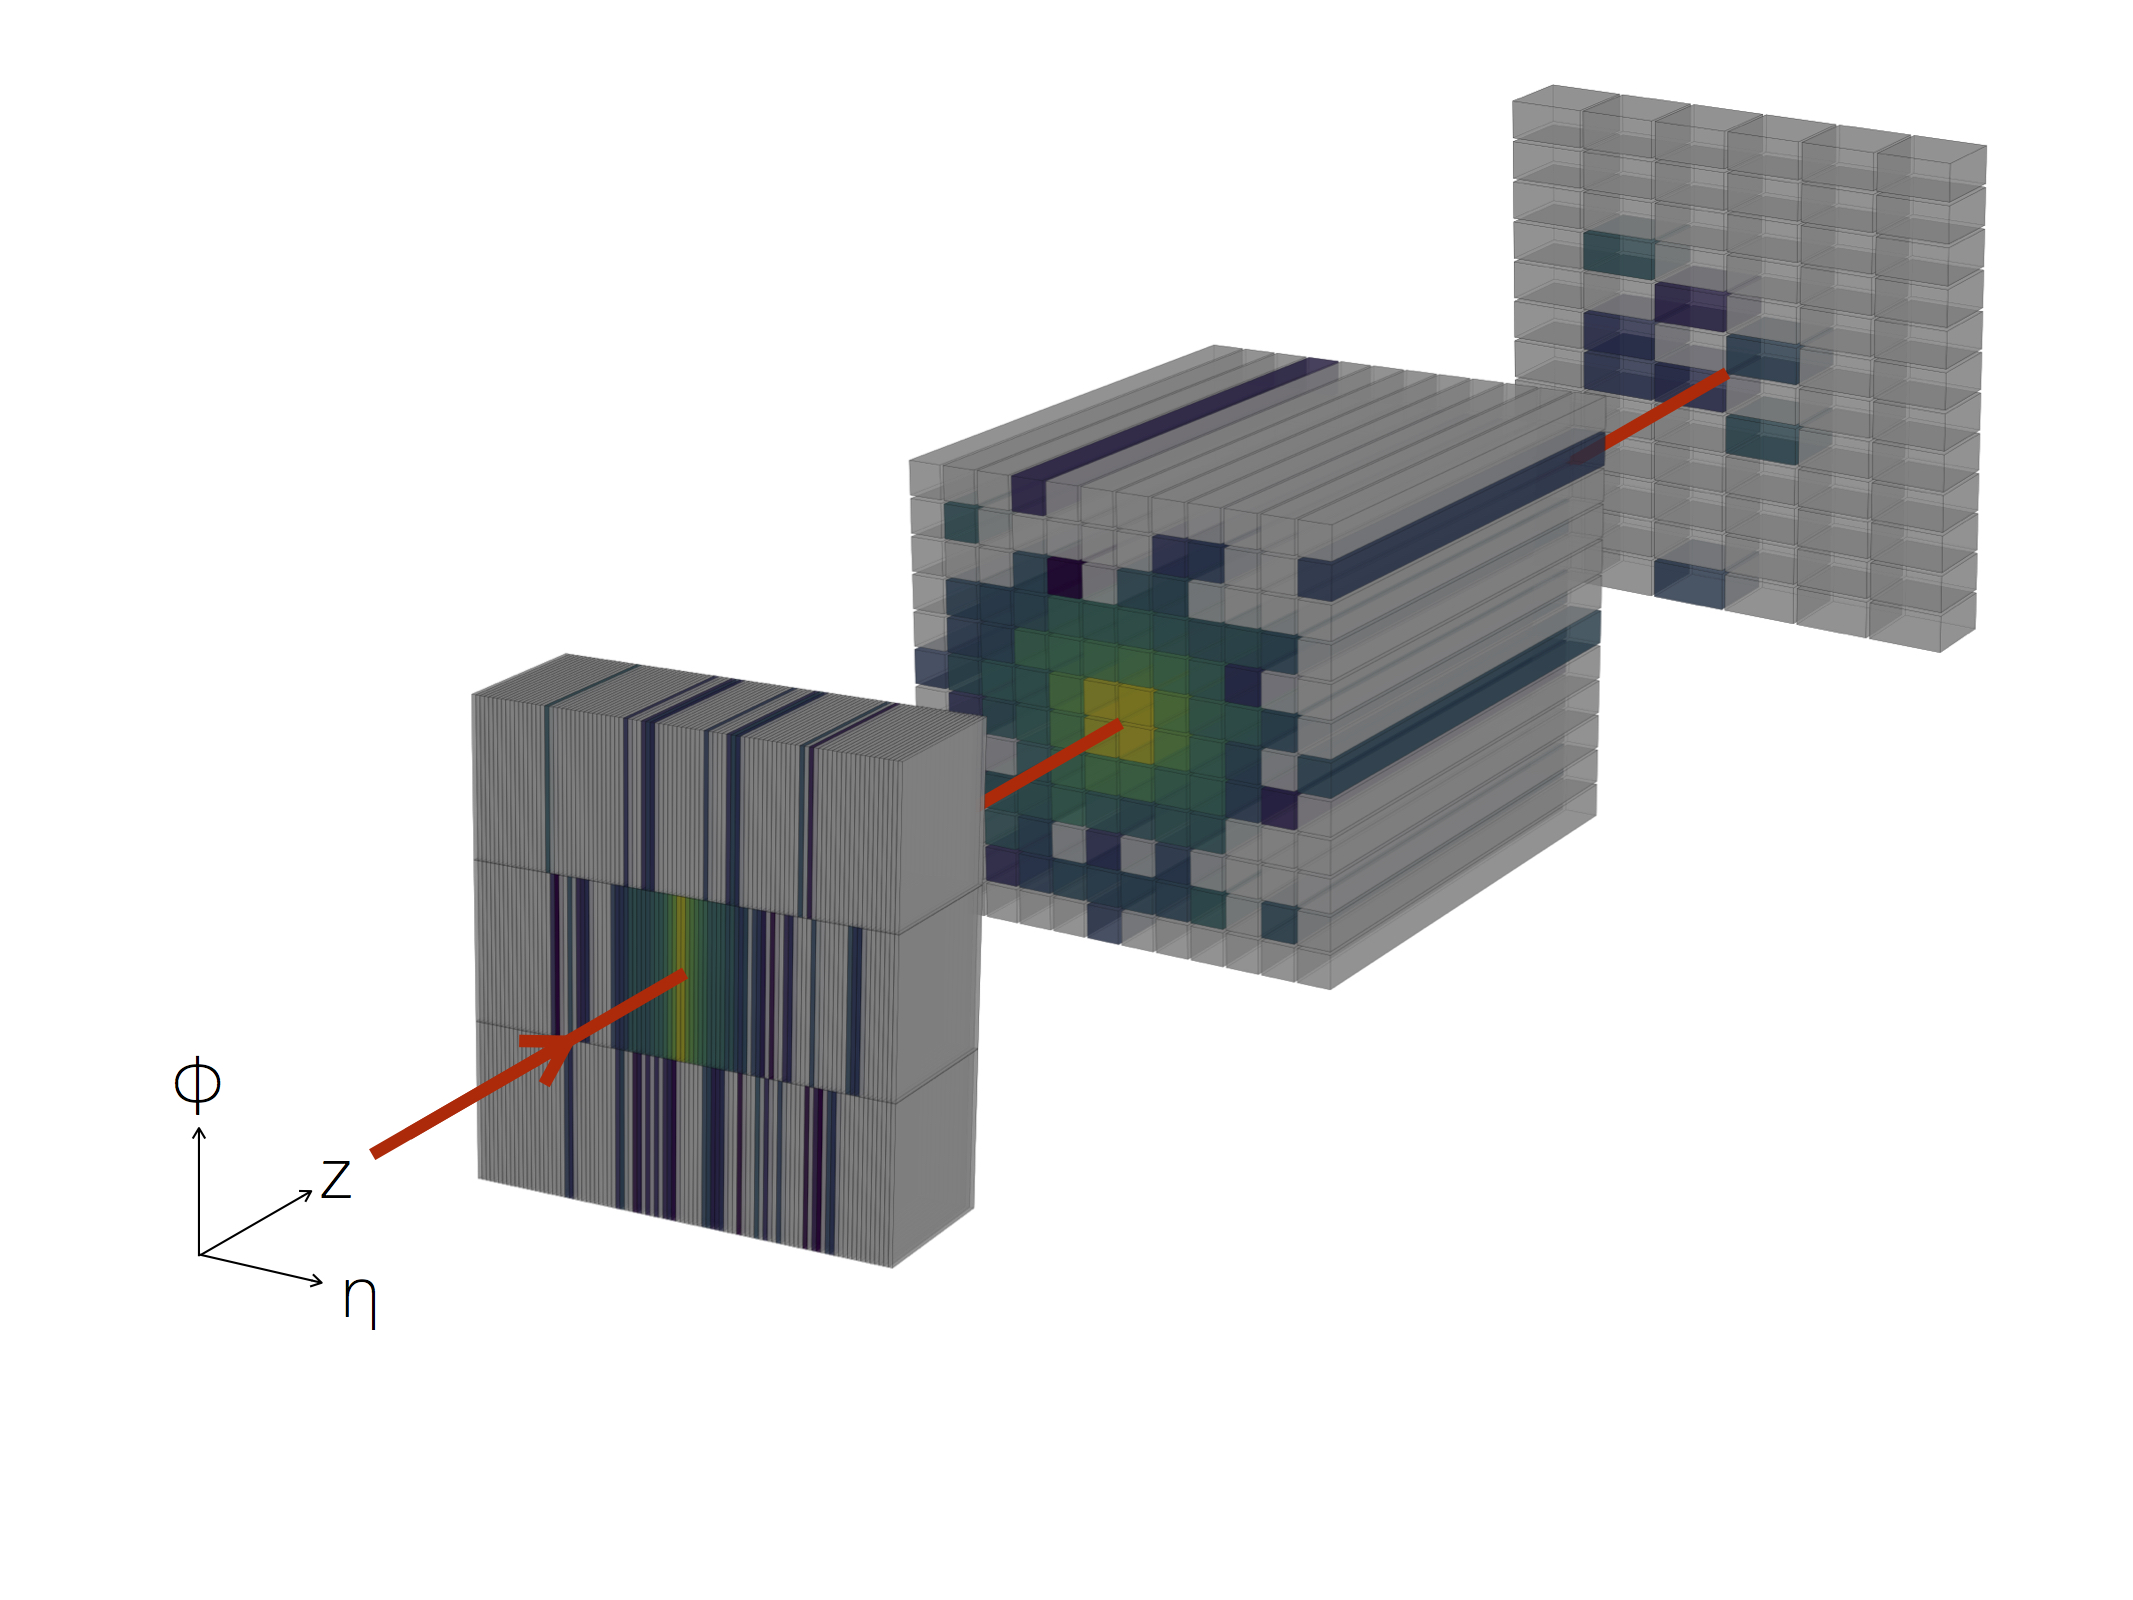

In [ ]:
Image("calogan.jpg", width=320)

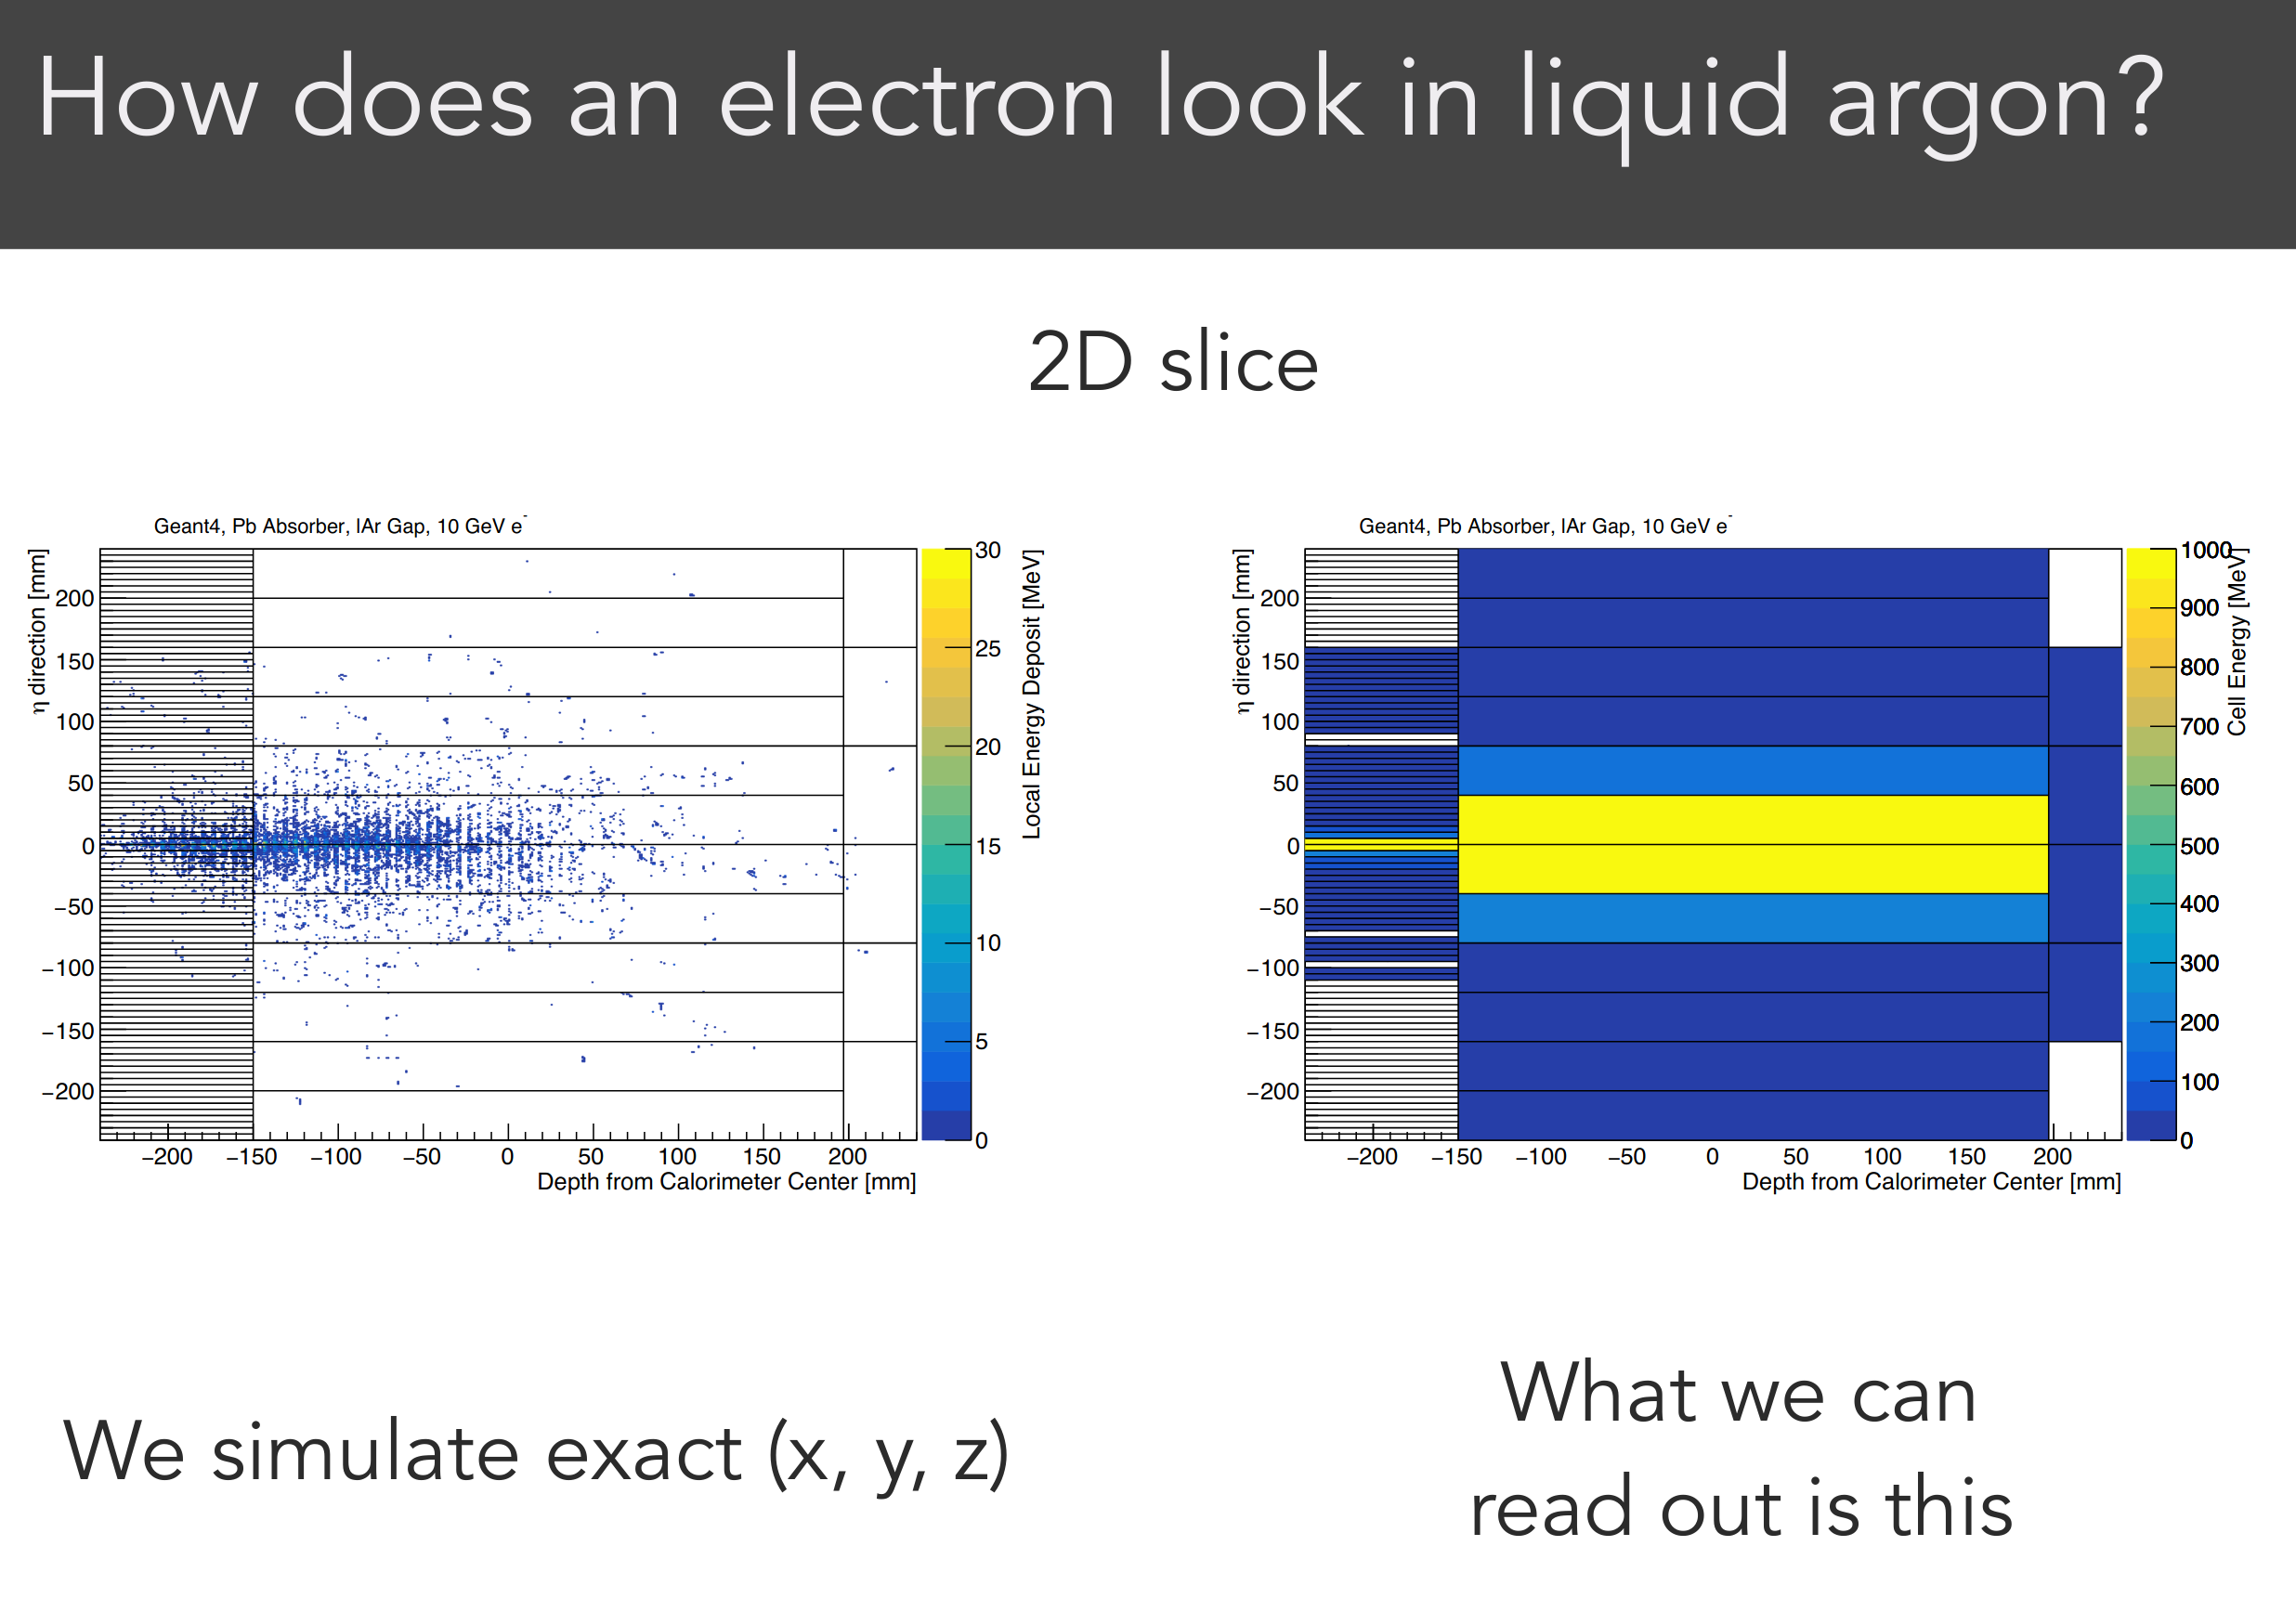

In [ ]:
Image("lar.png")


-   In Particle Physics, applications to simulation
-   CaloGAN is training a GAN to simulate the calorimeter response to
    particles
    -   This is an extremely time consuming step in simulation and
        important for HL-LHC which will have huge pile-up

[https://github.com/hep-lbdl/CaloGAN](https://github.com/hep-lbdl/CaloGAN)
[https://indico.cern.ch/event/567550/contributions/2629438/attachments/1510662/2355700/ACAT_GAN.pdf](https://indico.cern.ch/event/567550/contributions/2629438/attachments/1510662/2355700/ACAT_GAN.pdf)



## How it looks in PyTorch



-   Let's make a really simple GAN for MNIST
    -   Simple means basic feedforward neural nets for D and G
-   Starting with the discriminator, it takes an image, treats it as a
    vector, outputs a sigmoid which should be 0 for fake, 1 for real images
-   Dropout to discourage it from memorizing inputs (also D
    usually works too well, if its too good, G will never be
    able to learn)



In [ ]:
import torch
class Discriminator(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = torch.nn.Linear(784,256)
    self.fc2 = torch.nn.Linear(256,128)
    self.fc3 = torch.nn.Linear(128,1)
    self.drop = torch.nn.Dropout(.5)
  def forward(self, x):
    x = x.view(-1,28*28)
    x = self.drop(torch.relu(self.fc1(x)))
    x = self.drop(torch.relu(self.fc2(x)))
    x = torch.sigmoid(self.fc3(x)).view(-1, 1)
    return x

## Generator



-   The generator is likewise fairly simple, 100 input nodes, which pass
    through some layers, up to 784 outputs = a 28x28 image
    -   The inputs can be generated from anything, they represent the
        latent space of MNIST images, we'll draw them from a normal distribution
-   BatchNorm to encourage it to speed up training



In [ ]:
class Generator(torch.nn.Module):
  def __init__(self, input_size=100):
    super().__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(self.input_size,256)
    self.fc2 = torch.nn.Linear(256,512)
    self.fc3 = torch.nn.Linear(512,784)
    self.bn1 = torch.nn.BatchNorm1d(256)
    self.bn2 = torch.nn.BatchNorm1d(512)
  def forward(self, x):
    x = torch.relu(self.bn1(self.fc1(x)))
    x = torch.relu(self.bn2(self.fc2(x)))
    x = torch.sigmoid(self.fc3(x))
    return x.view(-1,1,28,28)

## The training loop



-   On the next page is the code for training the GEN
-   The real heart of the exercise, we alternate running batches and updating G, then D
-   This is the "no-frills" version, I removed all the code to print out
    test images, keep track of losses, etc
-   We run the MNIST images in batches, for each batch of MNIST we:
    -   calculate the loss of D on real MNIST images vs output 1
    -   calculate the loss of D on some fake images (created by G) vs output 0
    -   update D by stepping the D optimizer
    -   calculate the loss of G by passing fake images into D and comparing to output 1
        -   We ignore the gradients of D here: we use D as a black box to
            tell us how well we're faking real MNIST images, and try to push
            G to give images with higher values on D
        -   Can think of latent variables to G to D as noise to a single
            number through some big network, and we only update the G part
            of the network here
    -   update G by stepping the G optimizer



## The training loop



In [ ]:
import torchvision as tv
import torch as th
batch_size=512
train = tv.datasets.MNIST('/data/torchvision', download=True, train=True, transform=tv.transforms.ToTensor())
train = th.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=6)
device = 'cuda'
D = Discriminator().to(device)
G = Generator().to(device)
g_optim = torch.optim.Adam(G.parameters(), lr=2e-4) # separate optimizers for the two networks
d_optim = torch.optim.Adam(D.parameters(), lr=2e-4)
lossf = torch.nn.BCELoss()
for epoch in range(100):
  for ii, (i, o) in enumerate(train):
    real, o = i.to(device), o.to(device)
    # some useful vectors
    ones = torch.tensor([1.]*i.size(0)).view(-1,1).to(device)
    zeros = torch.tensor([0.]*i.size(0)).view(-1,1).to(device)
    # update d
    d_optim.zero_grad()
    G.requires_grad=False # we don't need to keep the G gradients when updating d
    D.requires_grad=True
    loss = lossf(D(real), ones) # real images should have output 1
    loss.backward()
    fake = G(torch.randn(i.size(0), G.input_size).to(device))
    loss = lossf(D(fake), zeros) # fake images should have output 0
    loss.backward()
    d_optim.step() # we've collected both the real and fake gradients
    
    # update g
    g_optim.zero_grad()
    D.requires_grad=False # we don't need to keep the D gradients when updating d
    G.requires_grad=True
    fake = G(torch.randn(i.size(0), G.input_size).to(device))
    loss = lossf(D(fake), ones)
    loss.backward()
    fake = G(torch.randn(i.size(0), G.input_size).to(device))
    loss = lossf(D(fake), ones)
    loss.backward()
    g_optim.step()

## Training curves



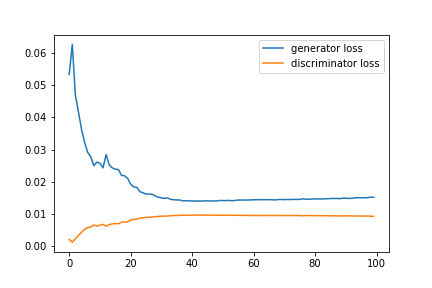

In [ ]:
Image("images/fc_training.png")

-   I ran the networks on the previous page for 100 epochs of the MNIST data
-   The (image averaged) loss curves for G and D, epoch by epoch
-   Initially, D has an easy time telling real from fake, then G started
    to figure out how to fool D a bit and eventually the networks
    stabilize



## Initial



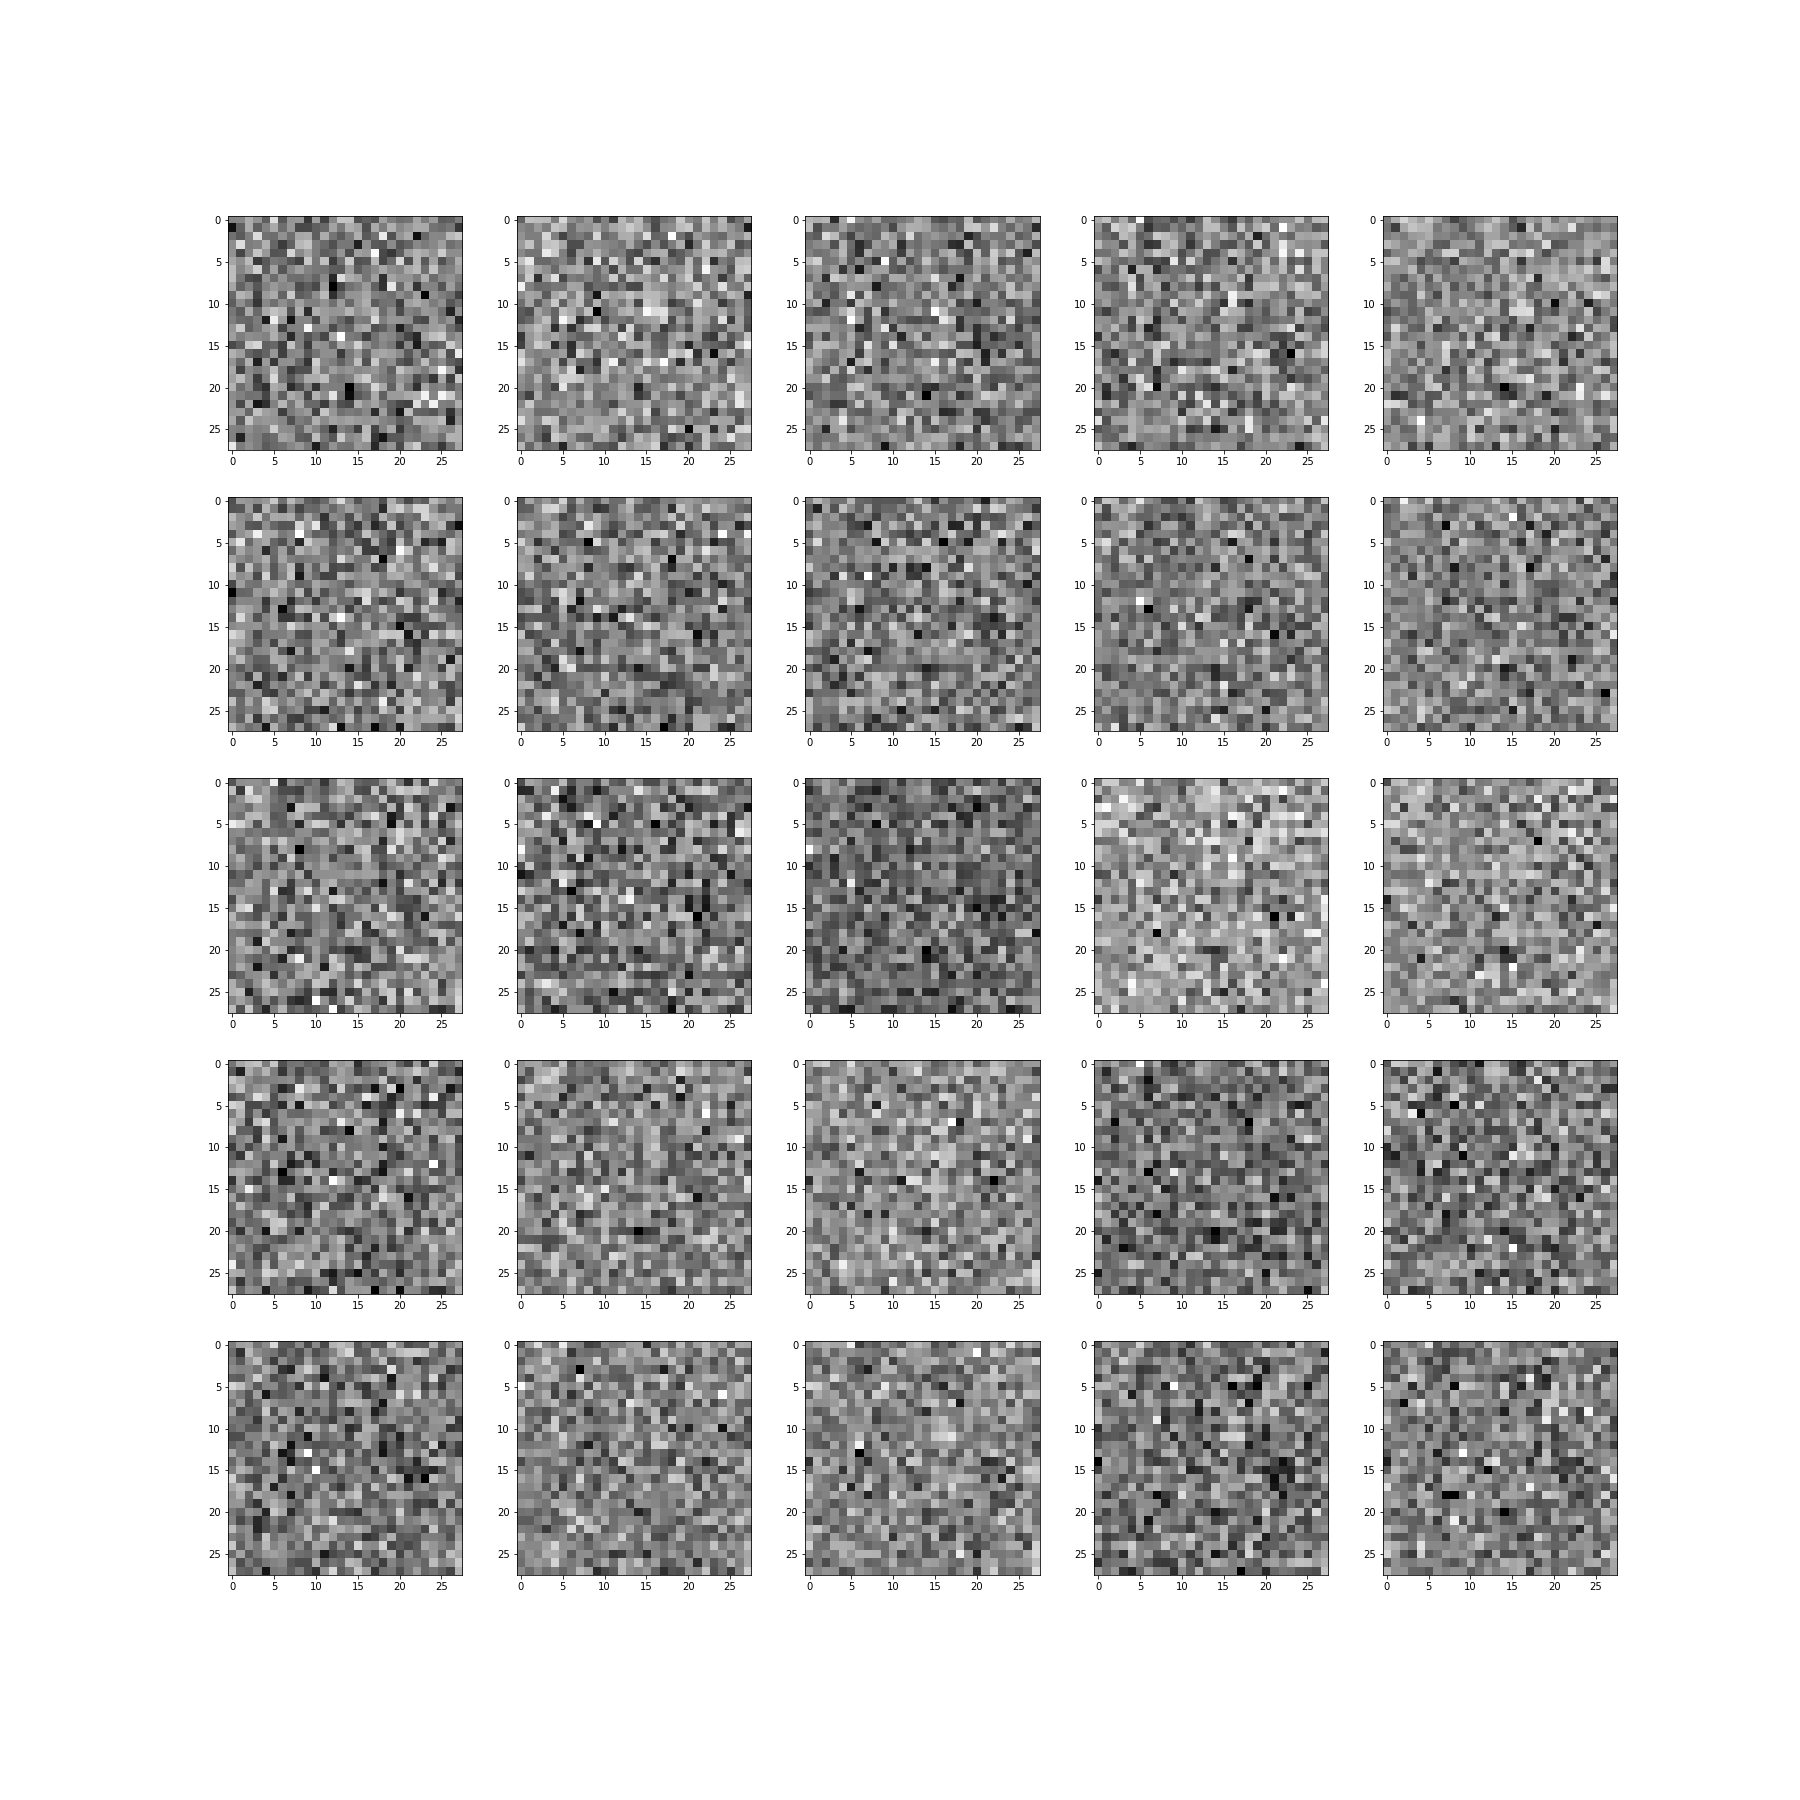

In [ ]:
Image("images/fc_000.png")

-   Before training, I generated some noise to test G with, these are
    the image output using the noise as input to G before any training
-   At the start, G gives out completely random pixels



## After one epoch



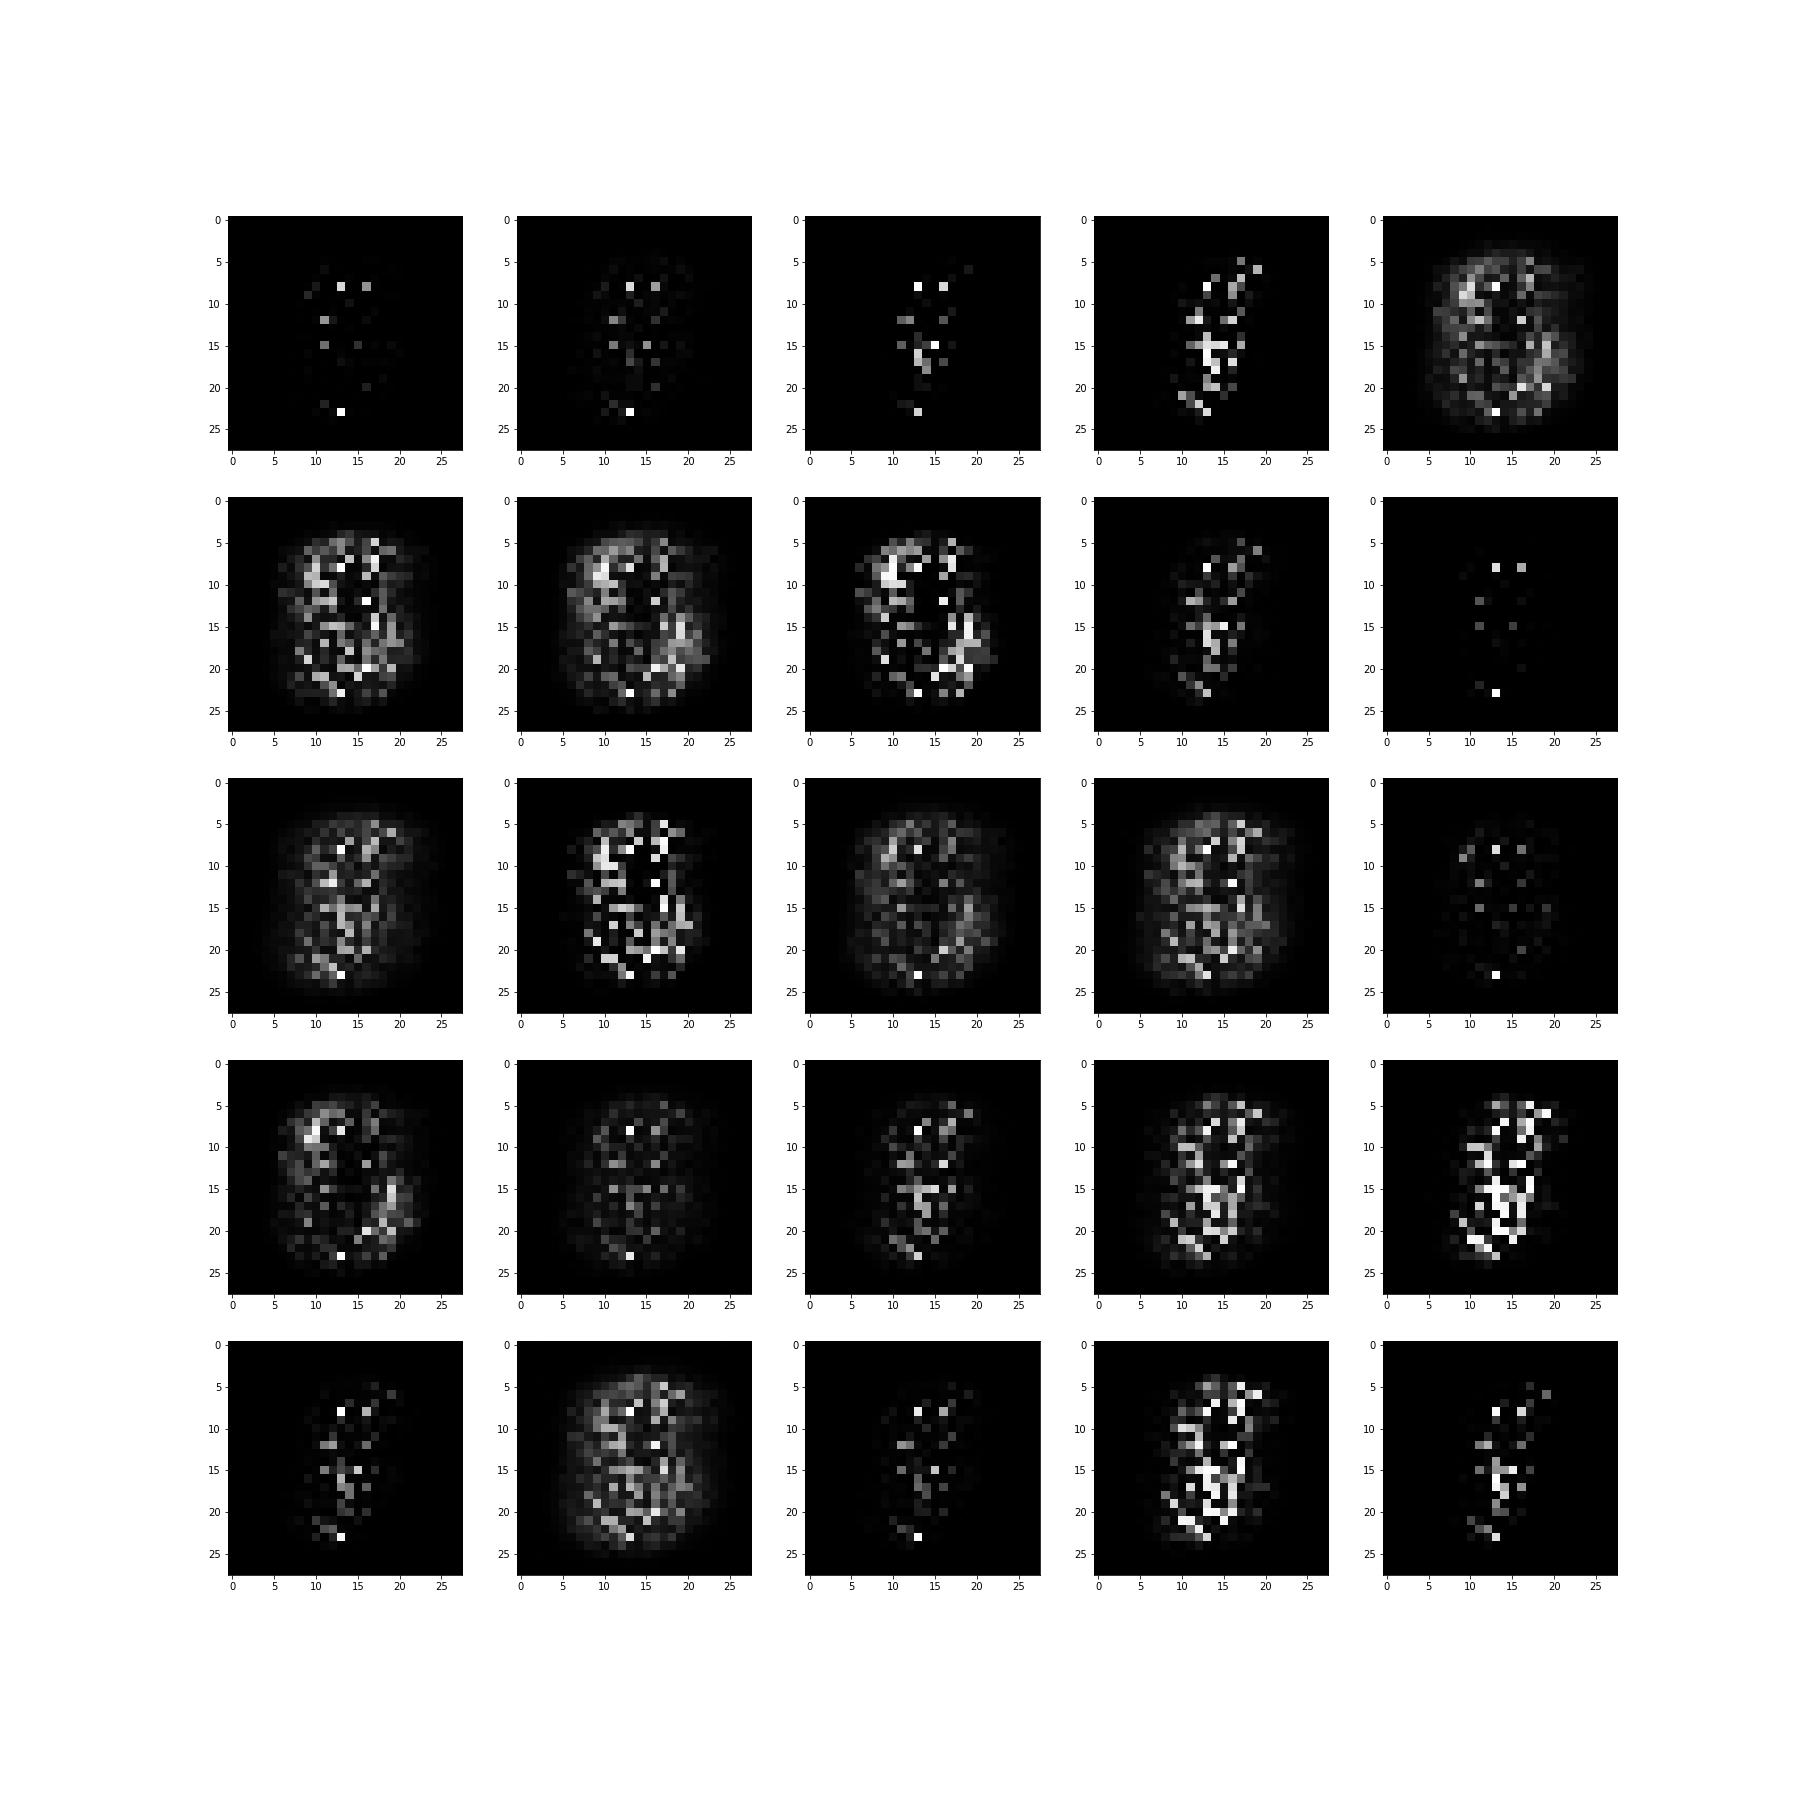

In [ ]:
Image("images/fc_001.png")

-   G has figured out that MNIST images are mostly black with some white
    bits (the same noise as previous page was used)



## After 2 epochs

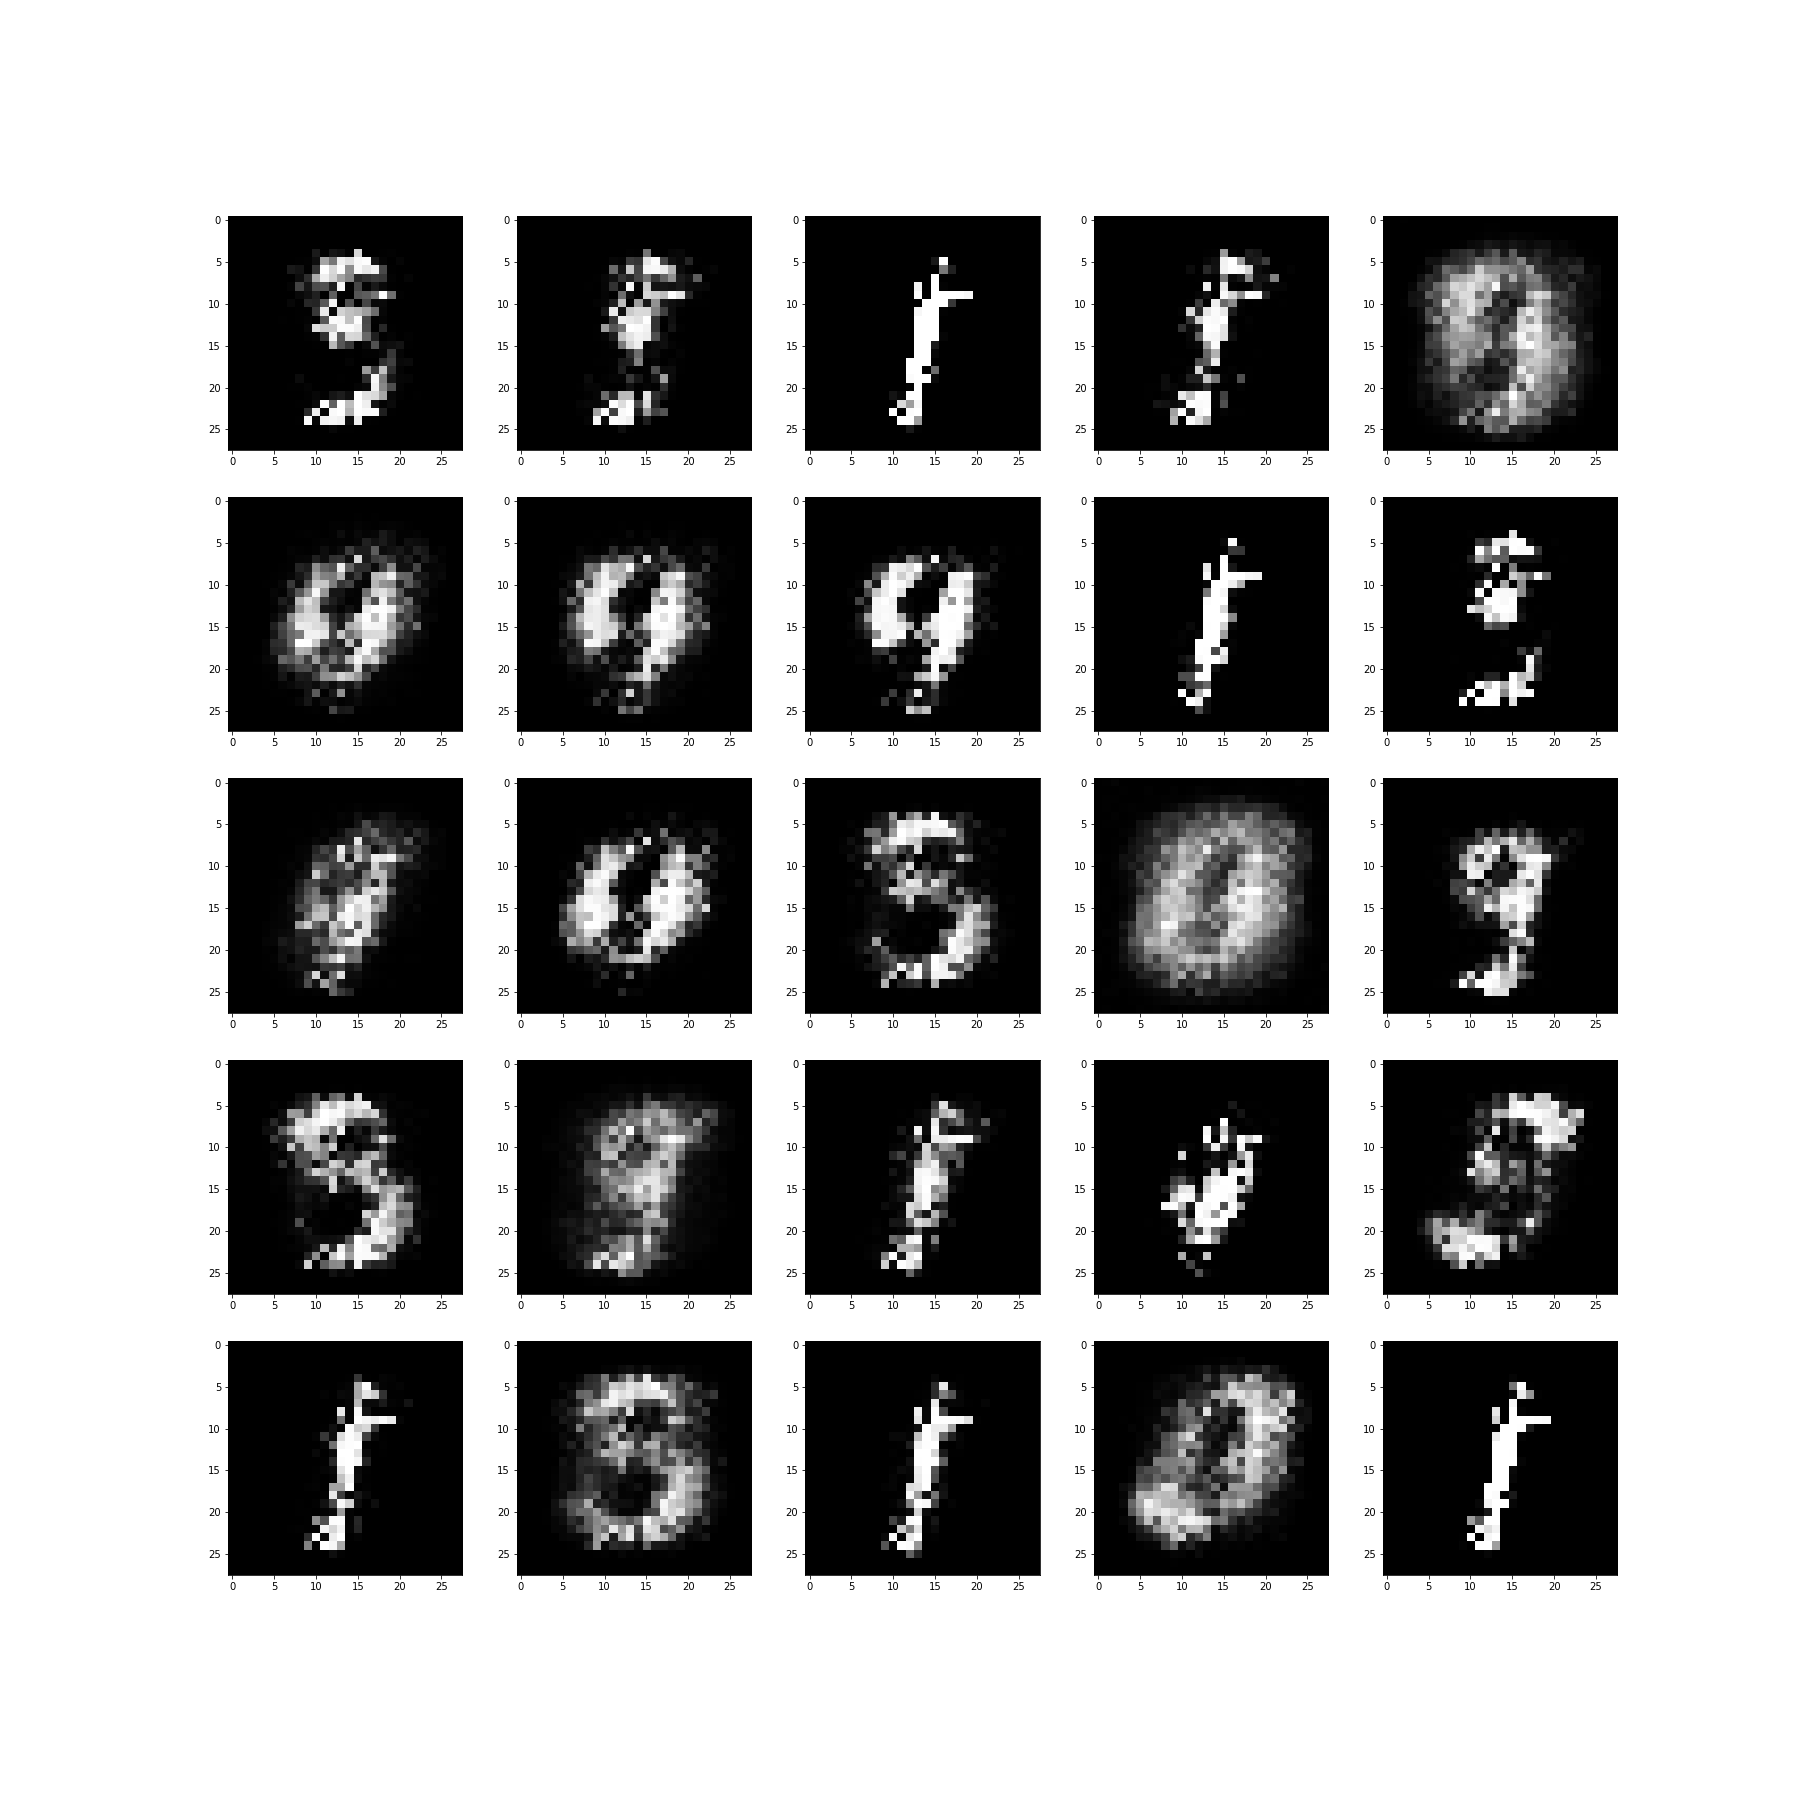

In [ ]:
Image("images/fc_002.png")

-   Some structures are becoming visible



## After 10 epochs



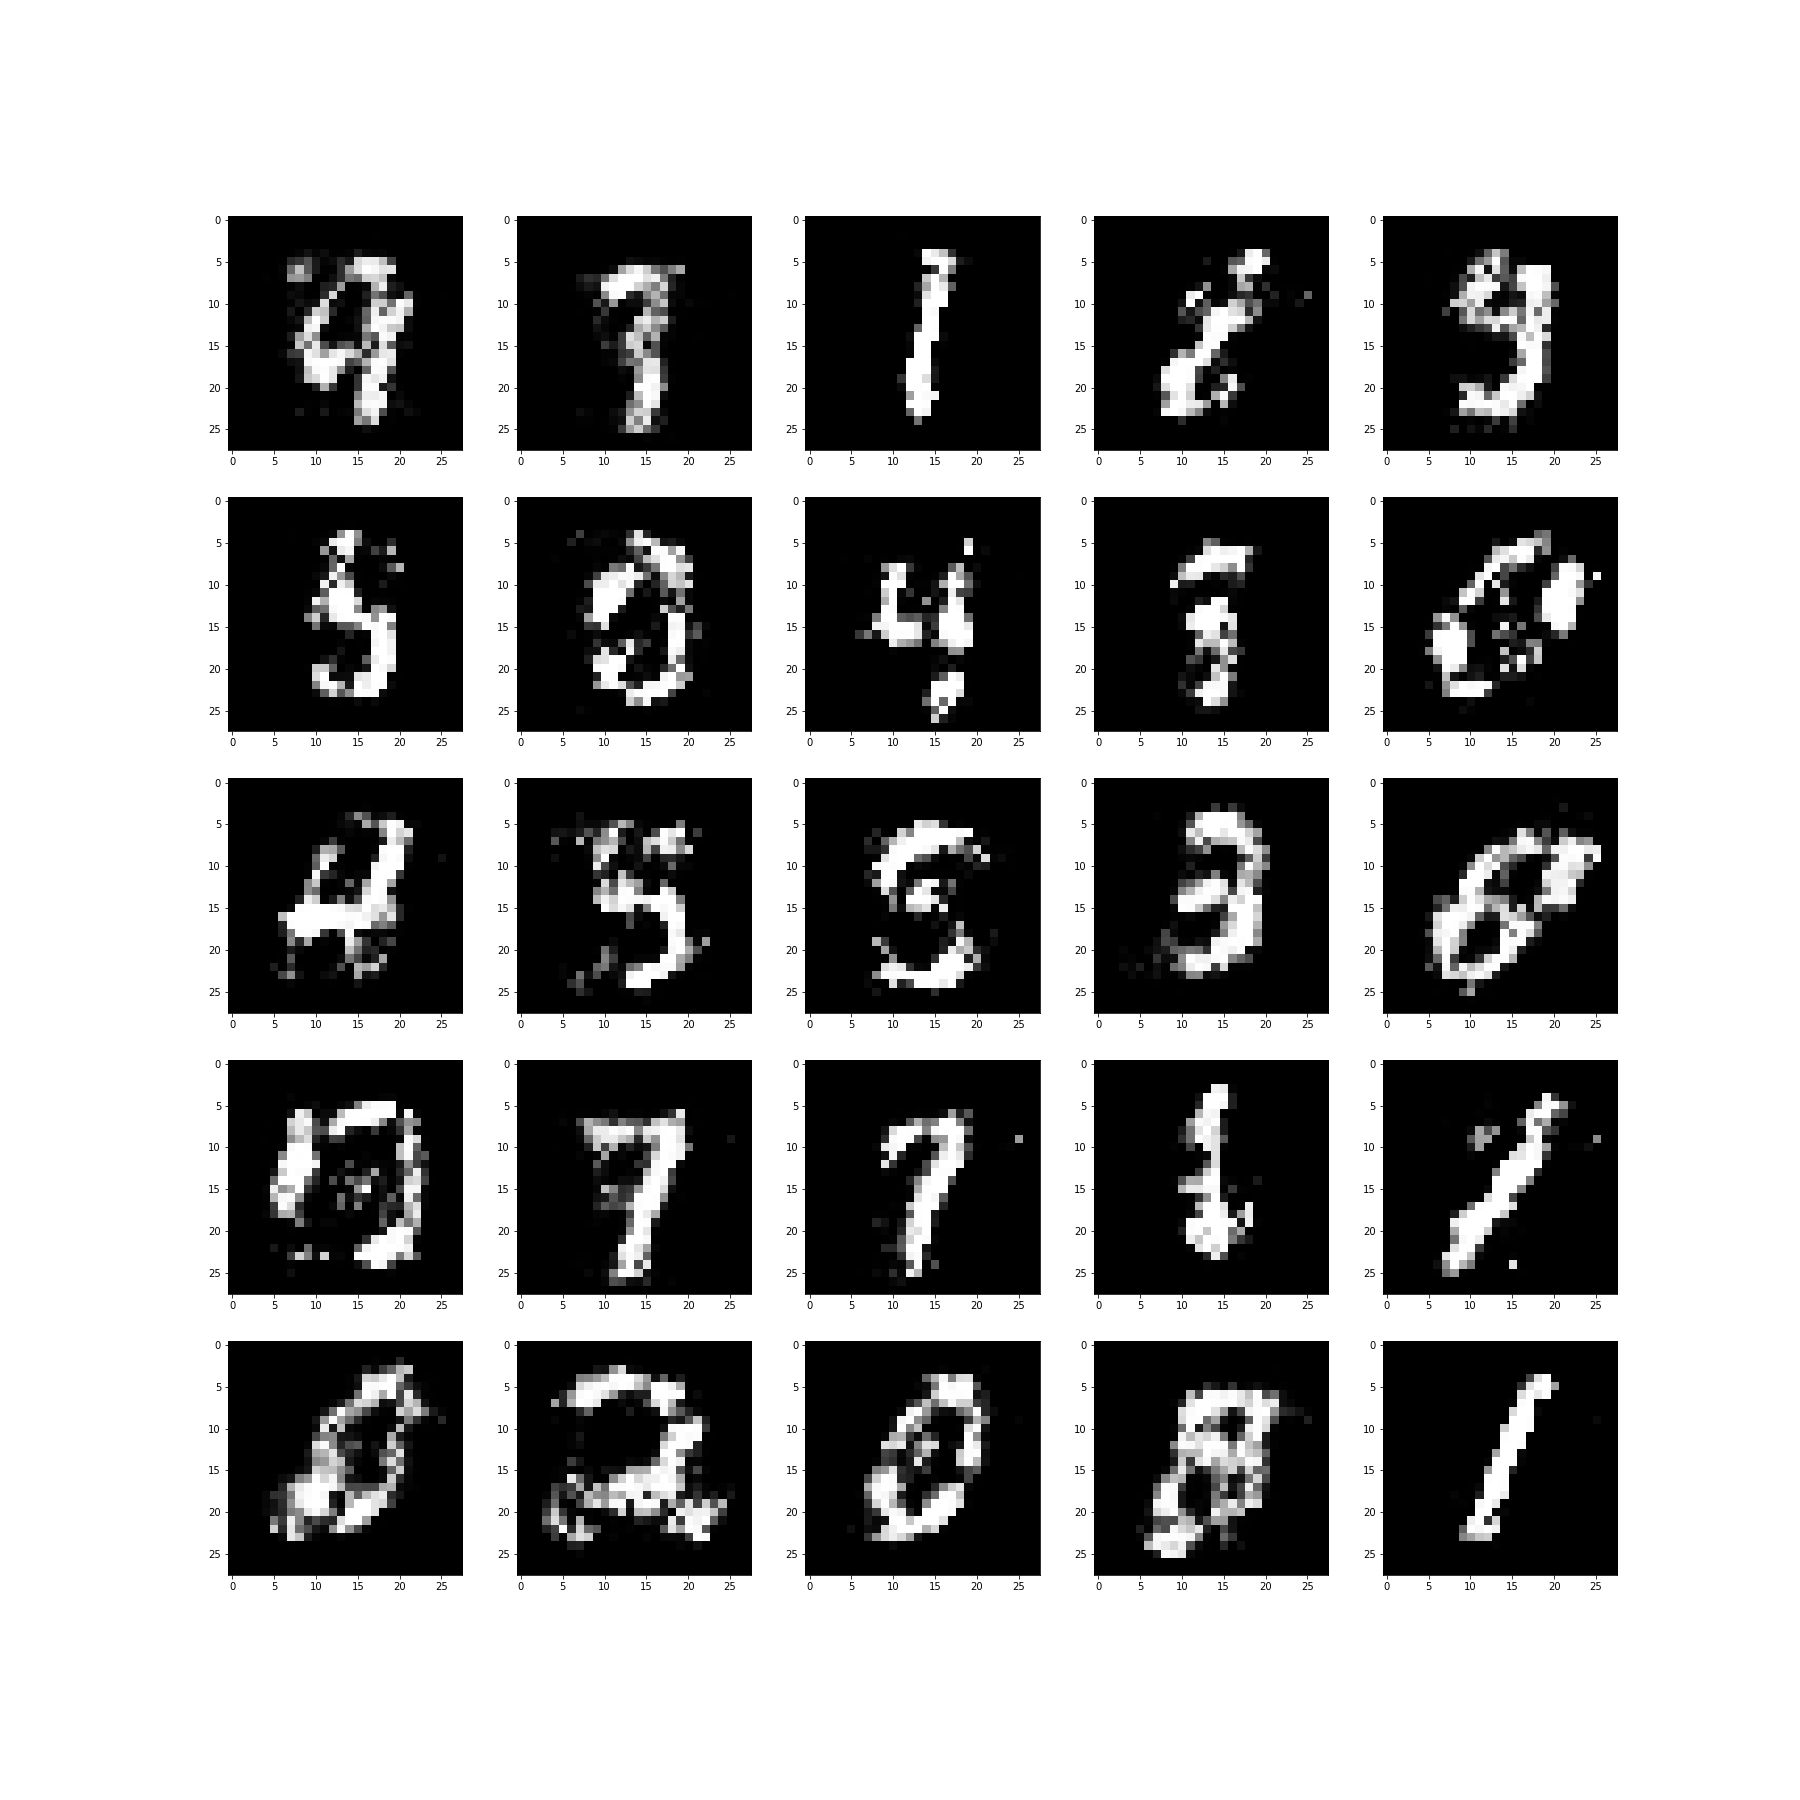

In [ ]:
Image("images/fc_010.png")

-   Starting to look like numbers



## After 100 epochs



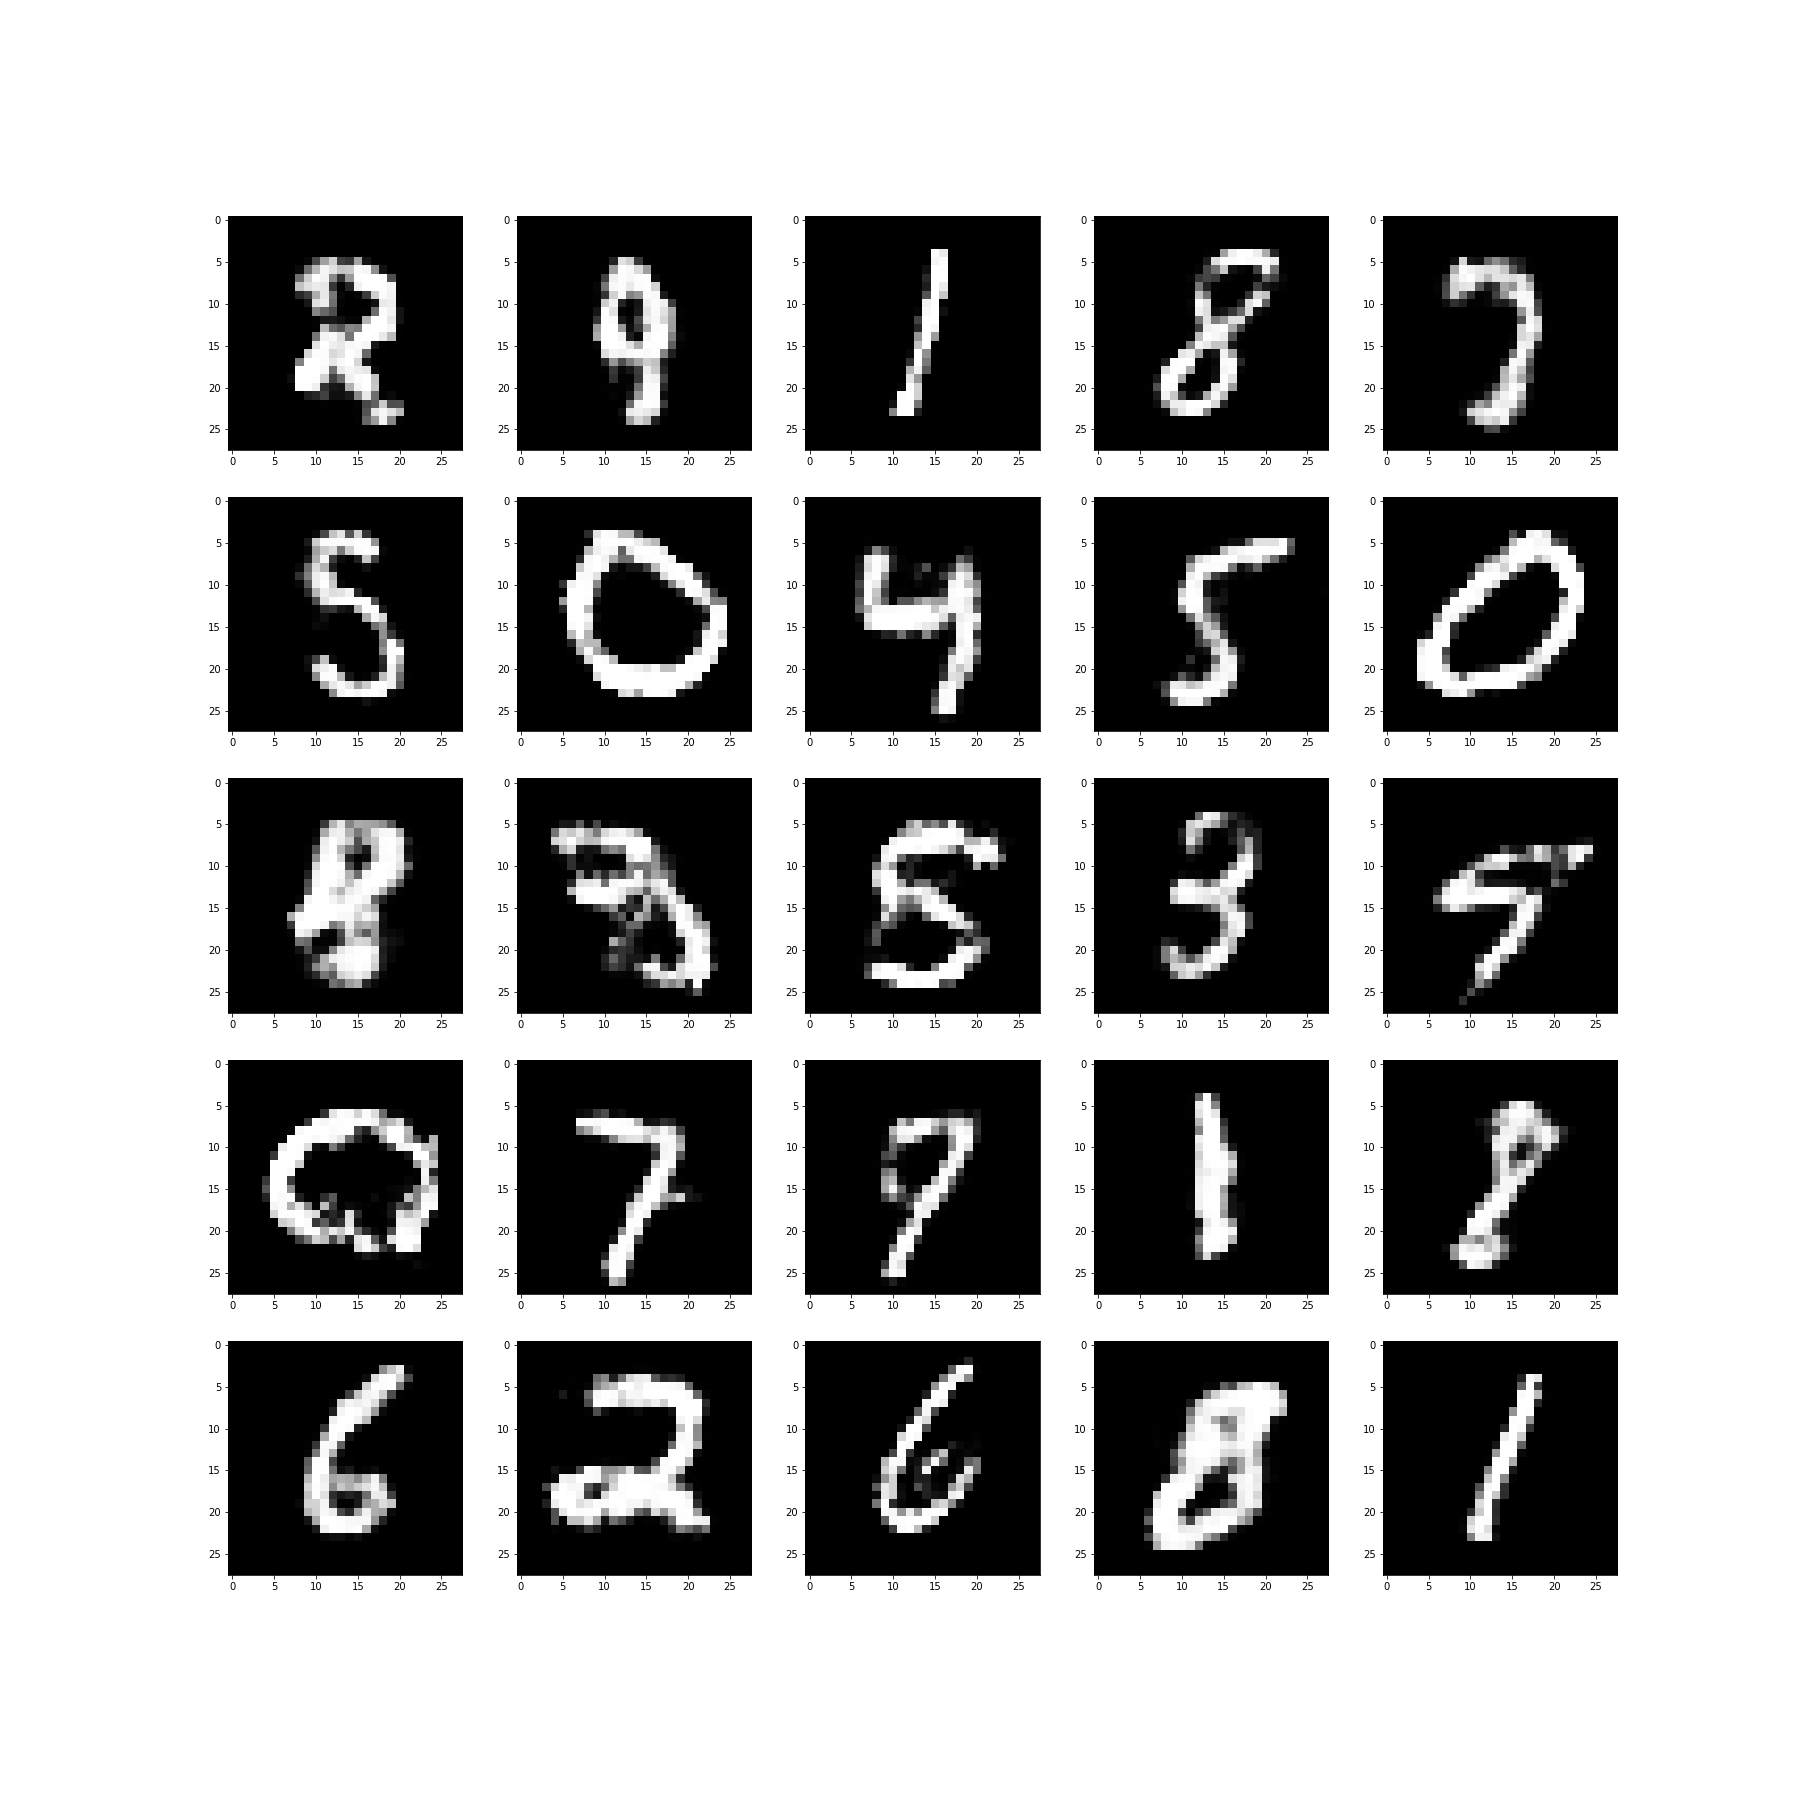

In [ ]:
Image("images/fc_099.png")

-   Looks like MNIST! (really we should check that G isn't just
    generating MNIST images)



## Failure Modes



-   The idea is both D and G are fighting over some characteristic
    features of the input, but the GAN setup is prone to failures
-   Memorizing the inputs:
    -   If D memorizes the input set, then it can just check
        pixel-by-pixel if the image is in the original dataset, then
        theres no way for G to generate "life-like" images except to
        generate images **exactly** from the dataset (we're looking for
        images with the same features as the dataset though)
    -   Protect by using large dropouts in D,  force
        it to learn robust features
    -   Similarly, if G memorizes the dataset, it can just output images
        from the dataset and there's literally no way to know whether the
        image is from MNIST or G
-   Mode collapse:
    -   We want to G to generate a wide variety of images, but it could
        decide to ignore the latent input and generate the same image for
        every input, slowly crafting it to fool D (ends up giving a
        memorized dataset image)
-   Oscillation
    -   D changes one way, G compensates, D goes back to a previous state,
        G goes back to the previous, and we're back at the beginning
    -   The networks oscillate their parameters and neither gets better or worse



## Exercises



-   To get a well trained generator network using the GAN method, you need
    to **try lots of hyperparameters, change change try some more**.

-   This includes the number of layers, the number of channels in each
    layer, the batch size, the learning rates, the type of optimizer, and so on.

-   The basic GAN concept can be enhanced in many, many, many ways. If
    you're interested in GANs [check out this list](https://github.com/eriklindernoren/PyTorch-GAN) of different types of
    GAN implemented in pytorch:

-   Some e.g.s [StyleGAN](https://github.com/NVlabs/stylegan) adds in additional information to the problem
    being modelled to control the output better: think of the cat example,
    the direction the cat is facing could become a controllable parameter with StyleGAN

-   For the exercises, we'll train the network shown in the lecture, then
    train it again on FashionMNIST.

Start by downloading the MNIST training set as in previous lectures
and making a DataLoader of batch size 64 (you only need training).



In [3]:
import torchvision as tv
import torch as th
import torch
import os

batch_size=64
train = tv.datasets.MNIST('.', download=True, train=True, transform=tv.transforms.ToTensor())
train = th.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Take the code from the lecture and change it to produce the outputs
shown. That is, you should keep track of generator and discriminator
loss per epoch and you should output a set of test images from G
before the training and after each epoch. To get images from G, set G
in eval mode (for the batch norm), generate some random noise with
shape (n<sub>images</sub>, 100) (or pregenerate to test the same input each
epoch, don't use the same noise for each G optimizer update though!),
pass the noise through G, this will give a set (n<sub>images</sub>, 28, 28),
where each image an example MNIST output. You can use `plt.savefig` to
output the test images after drawing them with matplotlib's `plt.imshow`.

Build the networks:



In [4]:
class Discriminator(th.nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = th.nn.Linear(784,256)
    self.fc2 = th.nn.Linear(256,128)
    self.fc3 = th.nn.Linear(128,1)
    self.drop = th.nn.Dropout(.3)

  def forward(self, x):
    x = x.view(-1,28*28)
    x = self.drop(th.relu(self.fc1(x)))
    x = self.drop(th.relu(self.fc2(x)))
    x = torch.sigmoid(self.fc3(x)).view(-1, 1)

    return x

class Generator(th.nn.Module):

  def __init__(self, input_size=100):
    super().__init__()
    self.input_size = input_size
    self.fc1 = th.nn.Linear(self.input_size,256)
    self.fc2 = th.nn.Linear(256,512)
    self.fc3 = th.nn.Linear(512,784)
    self.bn1 = th.nn.BatchNorm1d(256)
    self.bn2 = th.nn.BatchNorm1d(512)

  def forward(self, x):
    x = th.relu(self.bn1(self.fc1(x)))
    x = th.relu(self.bn2(self.fc2(x)))
    x = th.sigmoid(self.fc3(x))

    return x.view(-1,1,28,28)

Run the training (saving the images):



In [6]:
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda'
D = Discriminator().to(device)
G = Generator().to(device)
g_optim = torch.optim.Adam(G.parameters(), lr=5e-4) # separate optimizers for the two networks
d_optim = torch.optim.Adam(D.parameters(), lr=5e-4)
lossf = torch.nn.BCELoss()
e = 50
tr_loss_d = []
tr_loss_g = []

for epoch in range(e):
    G.eval()
    im = G(torch.randn(16, G.input_size).to(device)).view(-1,28,28).to('cpu').detach().numpy()
    fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
    for i in range(4):
        for j in range(4):
            ax[i][j].imshow(im[4*i+j])
            ax[i][j].axes.xaxis.set_visible(False)
            ax[i][j].axes.yaxis.set_visible(False)
    # plt.savefig(f'fig/{epoch}e_before.png')
    plt.savefig(f'images/{epoch}e_before.png')
    plt.clf()
    tot_d, n_d, tot_g, n_g = 0., 0, 0., 0
    for ii, (i, o) in enumerate(train):
        real, o = i.to(device), o.to(device)
        # some useful vectors
        ones = torch.tensor([1.]*i.size(0)).view(-1,1).to(device)
        zeros = torch.tensor([0.]*i.size(0)).view(-1,1).to(device)
        # update d
        d_optim.zero_grad()
        G.requires_grad=False # we don't need to keep the G gradients when updating d
        D.requires_grad=True
        loss = lossf(D(real), ones) # real images should have output 1
        loss.backward()
        tot_d += loss.item()*i.size(0)
        n_d += i.size(0)
        fake = G(torch.randn(i.size(0), G.input_size).to(device))
        loss = lossf(D(fake), zeros) # fake images should have output 0
        loss.backward()
        tot_d += loss.item()*i.size(0)
        n_d += i.size(0)
        d_optim.step() # we've collected both the real and fake gradients
        
        # update g
        g_optim.zero_grad()
        D.requires_grad=False # we don't need to keep the D gradients when updating d
        G.requires_grad=True
        fake = G(torch.randn(i.size(0), G.input_size).to(device))
        loss = lossf(D(fake), ones)
        loss.backward()
        tot_g += loss.item()*i.size(0)
        n_g += i.size(0)
        fake = G(torch.randn(i.size(0), G.input_size).to(device))
        loss = lossf(D(fake), ones)
        loss.backward()
        tot_g += loss.item()*i.size(0)
        n_g += i.size(0)
        g_optim.step()
    avg_loss_d = tot_d / float(n_d)
    tr_loss_d.append(avg_loss_d)
    avg_loss_g = tot_g / float(n_g)
    tr_loss_g.append(avg_loss_g)
    print(f"{epoch}epoch: train loss of D = {avg_loss_d}")
    print(f"{epoch}epoch: train loss of G = {avg_loss_g}")

0epoch: train loss of D = 0.08784237420234907
0epoch: train loss of G = 8.728456130822499
1epoch: train loss of D = 0.05072727343738079
1epoch: train loss of G = 5.426197192764282
2epoch: train loss of D = 0.08664488600560774
2epoch: train loss of G = 4.514875987243652
3epoch: train loss of D = 0.13112835307344795
3epoch: train loss of G = 4.052801841163635
4epoch: train loss of D = 0.1939469774732987
4epoch: train loss of G = 3.4085780829111734
5epoch: train loss of D = 0.25951297504107157
5epoch: train loss of G = 2.717865300051371
6epoch: train loss of D = 0.3366342779358228
6epoch: train loss of G = 2.1578326068878173
7epoch: train loss of D = 0.3886007424434026
7epoch: train loss of G = 1.825020831044515
8epoch: train loss of D = 0.41692544966538747
8epoch: train loss of G = 1.6907504192352294
9epoch: train loss of D = 0.45101954277356465
9epoch: train loss of G = 1.5178016040802003
10epoch: train loss of D = 0.4994299676497777
10epoch: train loss of G = 1.32062324590683
11epoch: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


20epoch: train loss of D = 0.6191616620222727
20epoch: train loss of G = 0.9213152797857921
21epoch: train loss of D = 0.624896479956309
21epoch: train loss of G = 0.9019102990468343
22epoch: train loss of D = 0.6249696501572927
22epoch: train loss of G = 0.9018843372662863
23epoch: train loss of D = 0.6288000325679779
23epoch: train loss of G = 0.895460479148229
24epoch: train loss of D = 0.6343021183013916
24epoch: train loss of G = 0.8766506551424662
25epoch: train loss of D = 0.6327328386783599
25epoch: train loss of G = 0.878762229347229
26epoch: train loss of D = 0.6331424851576487
26epoch: train loss of G = 0.8767331393877665
27epoch: train loss of D = 0.6327262554804484
27epoch: train loss of G = 0.879547238667806
28epoch: train loss of D = 0.6340272259553273
28epoch: train loss of G = 0.8756153538386027
29epoch: train loss of D = 0.6354247975031535
29epoch: train loss of G = 0.8688098145484924
30epoch: train loss of D = 0.6377541960716248
30epoch: train loss of G = 0.864156488

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Output some images (here's an example showing how to show images saved on disk in a jupyter notebook, change the filename to one of the images you output,
load images for a few different epochs):



In [7]:
from IPython.display import Image # needed to embed an image
Image(filename='images/fc_097.png', embed=True)

FileNotFoundError: ignored

Draw the generator and discriminator loss curves vs n epochs:



0.6333243395169575
0.8742019106388093


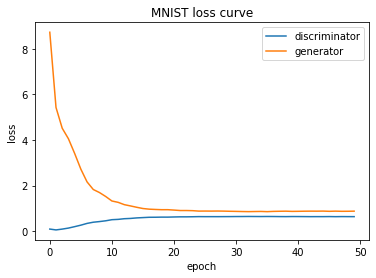

In [8]:
plt.plot(tr_loss_d, label='discriminator')
plt.plot(tr_loss_g, label='generator')
plt.legend()
plt.title('MNIST loss curve')
plt.xlabel('epoch')
plt.ylabel('loss')
print(tr_loss_d[-1])
print(tr_loss_g[-1])

Now do the same, but use FashionMNIST for the training data instead of
MNIST. Change the discriminator and generator networks to be larger,
since this is more structured data.

Download the FashionMNIST data:



In [9]:
import torchvision as tv
import torch as th
import torch
trans = tv.transforms.ToTensor()
train_f = th.utils.data.DataLoader(tv.datasets.FashionMNIST('.', train=True, download=True, transform=trans), batch_size=64)
#test_f = th.utils.data.DataLoader(tv.datasets.FashionMNIST('.', train=False, download=True, transform=trans), batch_size=64, num_workers=6)


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



torch.Size([64, 1, 28, 28])


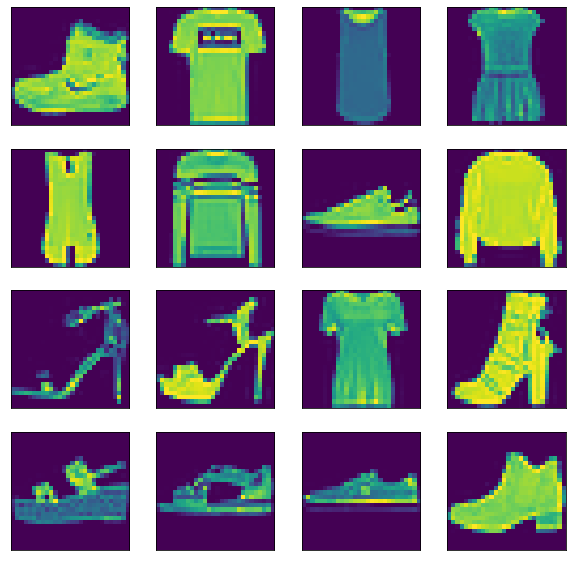

In [10]:
import matplotlib.pyplot as plt

x = next(iter(train_f))
print(x[0].shape)
fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(x[0][4*i+j,:,:,:].view(28,28))
        ax[i][j].axes.xaxis.set_visible(False)
        ax[i][j].axes.yaxis.set_visible(False)

Build the networks:



In [11]:
class Discriminator_br(th.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = th.nn.Linear(784,512)
    self.fc2 = th.nn.Linear(512,256)
    self.fc3 = th.nn.Linear(256,128)
    self.fc4 = th.nn.Linear(128,1)
    self.drop = th.nn.Dropout(.5)
  def forward(self, x):
    x = x.view(-1,28*28)
    x = self.drop(th.relu(self.fc1(x)))
    x = self.drop(th.relu(self.fc2(x)))
    x = self.drop(th.relu(self.fc3(x)))
    x = torch.sigmoid(self.fc4(x)).view(-1, 1)
    return x

class Generator_br(torch.nn.Module):
  def __init__(self, input_size=100):
    super().__init__()
    self.input_size = input_size
    self.fc1 = th.nn.Linear(self.input_size,128)
    self.fc2 = th.nn.Linear(128,256)
    self.fc3 = th.nn.Linear(256,512)
    self.fc4 = th.nn.Linear(512,784)
    self.bn1 = th.nn.BatchNorm1d(128)
    self.bn2 = th.nn.BatchNorm1d(256)
    self.bn3 = th.nn.BatchNorm1d(512)
  def forward(self, x):
    x = th.relu(self.bn1(self.fc1(x)))
    x = th.relu(self.bn2(self.fc2(x)))
    x = th.relu(self.bn3(self.fc3(x)))
    x = th.sigmoid(self.fc4(x))
    return x.view(-1,1,28,28)

Run the training (monitor the loss so you can see if you've hit a
failure mode and need to change the hyperparameters to get the GAN to
train properly):



In [12]:
device = 'cuda'
D_br = Discriminator_br().to(device)
G_br = Generator_br().to(device)
g_optim = th.optim.Adam(G_br.parameters(), lr=6e-4) # separate optimizers for the two networks
d_optim = th.optim.Adam(D_br.parameters(), lr=6e-4)
lossf = th.nn.BCELoss()
e = 50
tr_loss_d_br = []
tr_loss_g_br = []

for epoch in range(e):
    G_br.eval()
    im = G_br(th.randn(16, G_br.input_size).to(device)).view(-1,28,28).to('cpu').detach().numpy()
    fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
    for i in range(4):
        for j in range(4):
            ax[i][j].imshow(im[4*i+j])
            ax[i][j].axes.xaxis.set_visible(False)
            ax[i][j].axes.yaxis.set_visible(False)
    plt.savefig(f'images/{epoch}e_before_f.png')
    plt.clf()
    tot_d, n_d, tot_g, n_g = 0., 0, 0., 0
    for ii, (i, o) in enumerate(train_f):
        real, o = i.to(device), o.to(device)
        # some useful vectors
        ones = th.tensor([1.]*i.size(0)).view(-1,1).to(device)
        zeros = th.tensor([0.]*i.size(0)).view(-1,1).to(device)
        # update d
        d_optim.zero_grad()
        G_br.requires_grad=False # we don't need to keep the G gradients when updating d
        D_br.requires_grad=True
        loss = lossf(D_br(real), ones) # real images should have output 1
        loss.backward()
        tot_d += loss.item()*i.size(0)
        n_d += i.size(0)
        fake = G_br(th.randn(i.size(0), G_br.input_size).to(device))
        loss = lossf(D_br(fake), zeros) # fake images should have output 0
        loss.backward()
        tot_d += loss.item()*i.size(0)
        n_d += i.size(0)
        d_optim.step() # we've collected both the real and fake gradients
        
        # update g
        g_optim.zero_grad()
        D_br.requires_grad=False # we don't need to keep the D gradients when updating d
        G_br.requires_grad=True
        fake = G_br(torch.randn(i.size(0), G_br.input_size).to(device))
        loss = lossf(D_br(fake), ones)
        loss.backward()
        tot_g += loss.item()*i.size(0)
        n_g += i.size(0)
        fake = G_br(torch.randn(i.size(0), G_br.input_size).to(device))
        loss = lossf(D_br(fake), ones)
        loss.backward()
        tot_g += loss.item()*i.size(0)
        n_g += i.size(0)
        g_optim.step()
    avg_loss_d = tot_d / float(n_d)
    tr_loss_d_br.append(avg_loss_d)
    avg_loss_g = tot_g / float(n_g)
    tr_loss_g_br.append(avg_loss_g)
    print(f"{epoch}epoch: train loss of D = {avg_loss_d}")
    print(f"{epoch}epoch: train loss of G = {avg_loss_g}")

0epoch: train loss of D = 0.08125379675031483
0epoch: train loss of G = 7.576000951353709
1epoch: train loss of D = 0.12615081527162497
1epoch: train loss of G = 3.2686227524439495
2epoch: train loss of D = 0.2246773271004359
2epoch: train loss of G = 2.6088279309590656
3epoch: train loss of D = 0.25724474368095396
3epoch: train loss of G = 2.192071169090271
4epoch: train loss of D = 0.3289224393248558
4epoch: train loss of G = 1.8000380932807922
5epoch: train loss of D = 0.3824099562048912
5epoch: train loss of G = 1.5418813137054443
6epoch: train loss of D = 0.40886252940098444
6epoch: train loss of G = 1.5634228298823039
7epoch: train loss of D = 0.4473868926604589
7epoch: train loss of G = 1.4198614501953124
8epoch: train loss of D = 0.4513090029001236
8epoch: train loss of G = 1.4379975116411845
9epoch: train loss of D = 0.4737393858353297
9epoch: train loss of G = 1.3659093328793843
10epoch: train loss of D = 0.522234965578715
10epoch: train loss of G = 1.1519942534764607
11epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


20epoch: train loss of D = 0.6116164551575979
20epoch: train loss of G = 0.9115557652314504
21epoch: train loss of D = 0.6314249154090882
21epoch: train loss of G = 0.8655319709618886
22epoch: train loss of D = 0.6278192205746969
22epoch: train loss of G = 0.8833382615884146
23epoch: train loss of D = 0.6298181495666504
23epoch: train loss of G = 0.8769783041000366
24epoch: train loss of D = 0.6456211548010509
24epoch: train loss of G = 0.8346889403343201
25epoch: train loss of D = 0.6493398130257925
25epoch: train loss of G = 0.8247521567344666
26epoch: train loss of D = 0.64100067486763
26epoch: train loss of G = 0.8413339280287425
27epoch: train loss of D = 0.6365741599400838
27epoch: train loss of G = 0.8733324945131937
28epoch: train loss of D = 0.6479556202729543
28epoch: train loss of G = 0.8284254527250926
29epoch: train loss of D = 0.6582918472290039
29epoch: train loss of G = 0.8063279635588328
30epoch: train loss of D = 0.6482505997021993
30epoch: train loss of G = 0.8352400

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Output some images you previously saved:



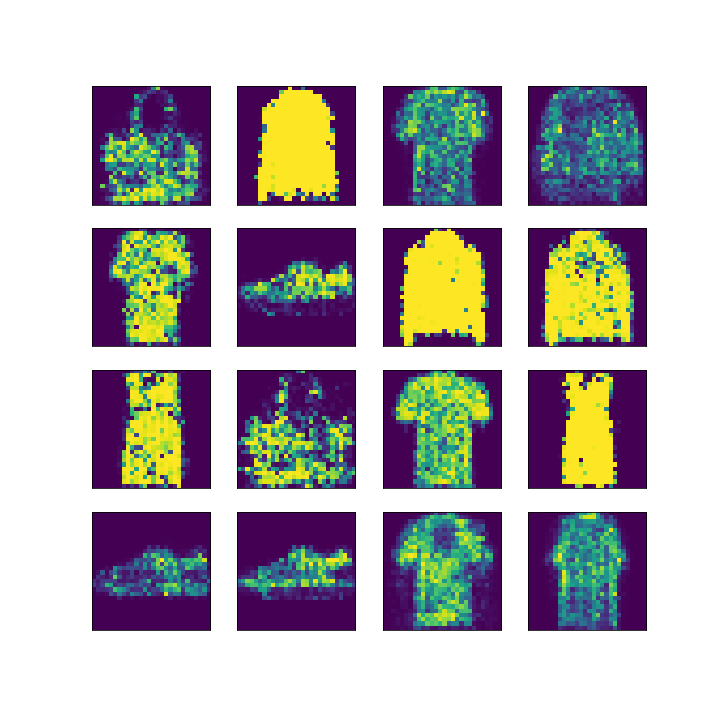

In [16]:
from IPython.display import Image # needed to embed an image
e = 49
Image(filename=f'images/{e}e_before_f.png', embed=True)

Draw the loss curves:



0.6799864847501119
0.7403923581441243


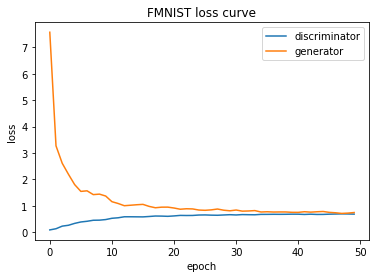

In [14]:
plt.plot(tr_loss_d_br, label='discriminator')
plt.plot(tr_loss_g_br, label='generator')
plt.legend()
plt.title('FMNIST loss curve')
plt.xlabel('epoch')
plt.ylabel('loss')
print(tr_loss_d_br[-1])
print(tr_loss_g_br[-1])